<a href="https://colab.research.google.com/github/Pineappledeydre/nafld_prediction/blob/main/Kim_Prediction_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from scipy.stats import ttest_ind, stats
import csv
from scipy.special import expit

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE,SelectFromModel

In [30]:
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
combined_df = pd.read_csv('/content/drive/MyDrive/Data/KIM_2024/–î–∞–Ω–Ω—ã–µ_–ü–æ—á–∏—â–µ–Ω–Ω—ã–µ/for_analysis_merged.csv')
observation_merged_df = pd.read_csv('/content/drive/MyDrive/Data/KIM_2024/–î–∞–Ω–Ω—ã–µ_–ü–æ—á–∏—â–µ–Ω–Ω—ã–µ/observation_merged.csv')
comparison_merged_df = pd.read_csv (('/content/drive/MyDrive/Data/KIM_2024/–î–∞–Ω–Ω—ã–µ_–ü–æ—á–∏—â–µ–Ω–Ω—ã–µ/comparison_merged.csv'))

## –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ

0.0 –º–æ–∂–µ—Ç –æ–±–æ–∑–Ω–∞—á–∞—Ç—å –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è –∏–ª–∏ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω—É—é –≥—Ä—É–ø–ø—É.

1.0 –º–æ–∂–µ—Ç –æ–±–æ–∑–Ω–∞—á–∞—Ç—å –Ω–∞–ª–∏—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è –∏–ª–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞–ª—å–Ω—É—é –≥—Ä—É–ø–ø—É.

In [33]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   –§–ò–û        180 non-null    object 
 1   –ü–æ–ª        180 non-null    object 
 2   –í–æ–∑—Ä–∞—Å—Ç    180 non-null    int64  
 3   –†–æ—Å—Ç,—Å–º    180 non-null    int64  
 4   –í–µ—Å,–∫–≥     180 non-null    float64
 5   –û.–∂.,%     180 non-null    float64
 6   –í–∏—Å—Ü.–∂,%   180 non-null    int64  
 7   –ú—ã—à.–º,%    180 non-null    float64
 8   –°–∫–µ–ª–µ—Ç,%   180 non-null    float64
 9   –ö–æ—Å—Ç–∏,–∫–≥   180 non-null    float64
 10  –í–æ–¥–∞,%     180 non-null    float64
 11  –°–û–û–í,–∫–∫–∞–ª  180 non-null    int64  
 12  –û–ì,—Å–º      180 non-null    int64  
 13  –û–¢,—Å–º      180 non-null    int64  
 14  –û–ñ,—Å–º      180 non-null    int64  
 15  –û–ë,—Å–º      180 non-null    float64
 16  –ò–ú–¢        180 non-null    float64
 17  –ê–õ–¢        180 non-null    float64
 18  –ê–°–¢  

In [34]:
# –£–¥–∞–ª–µ–Ω–∏–µ –Ω–µ–Ω—É–∂–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤
combined_df = combined_df.drop(columns=['–§–ò–û'])
combined_df = combined_df.drop(columns=['–†–æ—Å—Ç,—Å–º'])
combined_df = combined_df.drop(columns=['–í–µ—Å,–∫–≥'])  # –¢–∞–∫ –∫–∞–∫ –µ—Å—Ç—å –ò–ú–¢

if '–ü–æ–ª' in combined_df.columns:
    combined_df['–ü–æ–ª'] = combined_df['–ü–æ–ª'].replace({'–∂–µ–Ω': 1, '–º—É–∂': 0})

<ipython-input-34-fc768ffa810c>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df['–ü–æ–ª'] = combined_df['–ü–æ–ª'].replace({'–∂–µ–Ω': 1, '–º—É–∂': 0})


In [38]:
combined_df.rename(columns={'–ë–æ–ª–µ–Ω': 'Group'}, inplace=True)

### Correlation

In [35]:
# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
correlation_matrix = combined_df.corr().abs()

# –£—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –ø–æ—Ä–æ–≥–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
correlation_threshold = 0.55

# –í—ã–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–µ–≤—ã—à–∞—é—Ç –ø–æ—Ä–æ–≥ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
highly_correlated_features = np.where(correlation_matrix >= correlation_threshold)
highly_correlated_features = [(correlation_matrix.columns[x], correlation_matrix.columns[y]) for x, y in zip(*highly_correlated_features) if x != y and x < y]


In [36]:
# Print out the highly correlated feature pairs
print("Highly correlated features:")
# for feature_pair in highly_correlated_features:
#     print(feature_pair)

Highly correlated features:


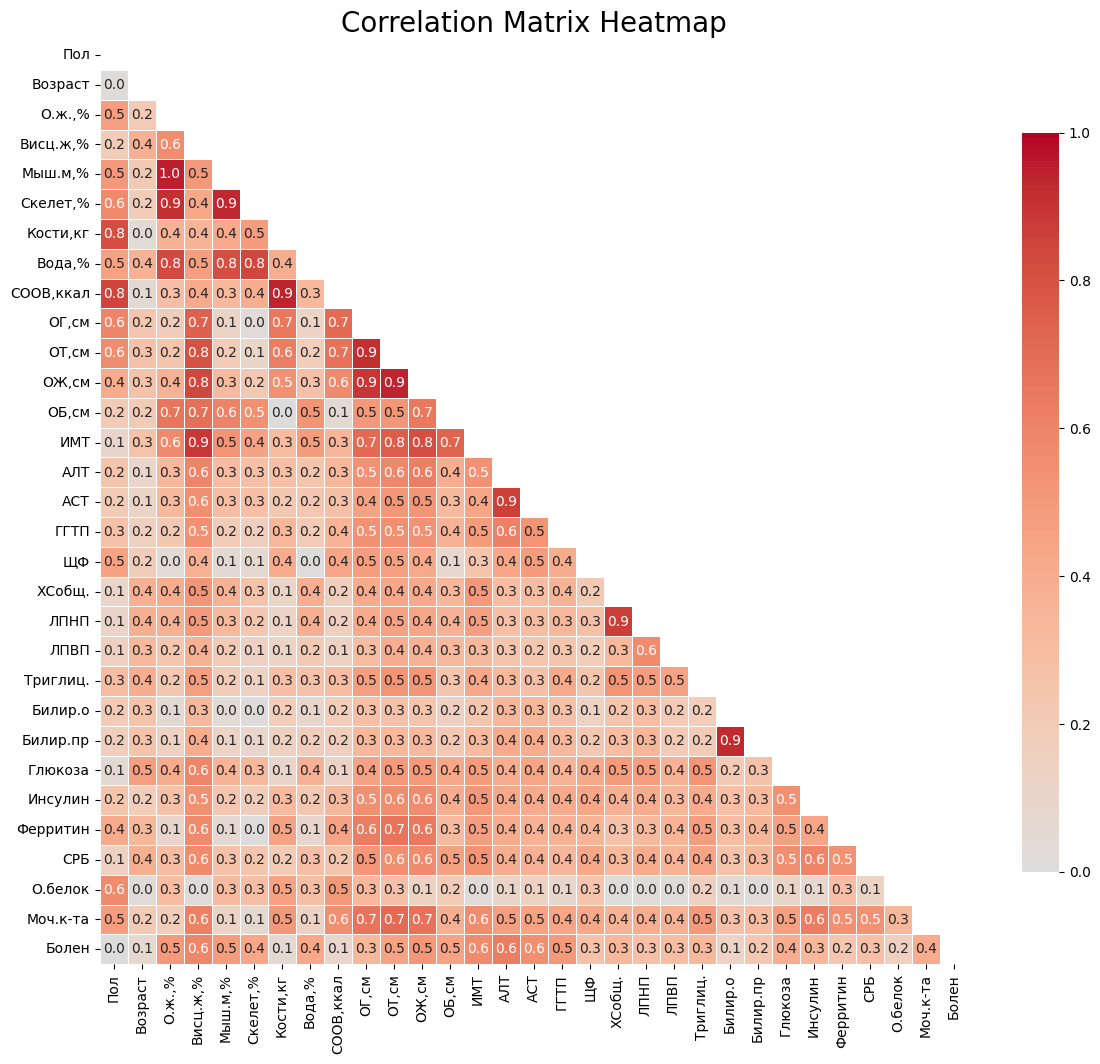

In [37]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))  # Bigger figure size

# Draw the heatmap with the mask
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.1f',
                      linewidths=0.5, vmin=0, vmax=1, mask=mask,
                      cbar_kws={"shrink": .8})  # Add colorbar with smaller shrinkage

# Adjust font size
plt.title('Correlation Matrix Heatmap', size=20)  # Bigger title
plt.xticks(size=10)  # Smaller x-axis labels
plt.yticks(size=10)  # Smaller y-axis labels

# Display the plot
plt.show()

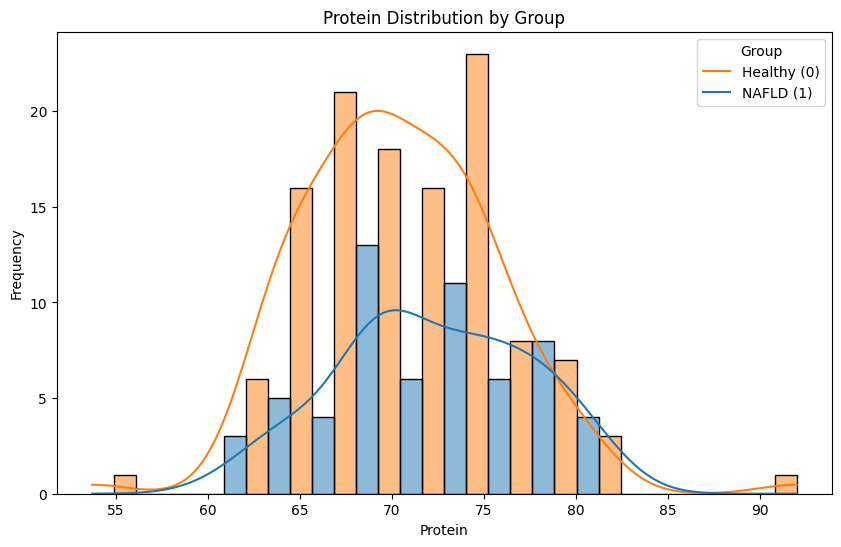

In [39]:
# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ –ø–æ –≥—Ä—É–ø–ø–∞–º
plt.figure(figsize=(10, 6))
sns.histplot(data= combined_df, x="–û.–±–µ–ª–æ–∫",
             hue="Group", multiple="dodge", kde=True)
plt.title("Protein Distribution by Group")
plt.xlabel("Protein")
plt.ylabel("Frequency")
plt.legend(title="Group", labels=["Healthy (0)", "NAFLD (1)"])
plt.show()

In [40]:
mean_protein_group_0 = combined_df[combined_df['Group'] == 0]['–û.–±–µ–ª–æ–∫'].mean()
mean_protein_group_1 = combined_df[combined_df['Group'] == 1]['–û.–±–µ–ª–æ–∫'].mean()

mean_protein_group_0, mean_protein_group_1

(72.235, 70.4275)

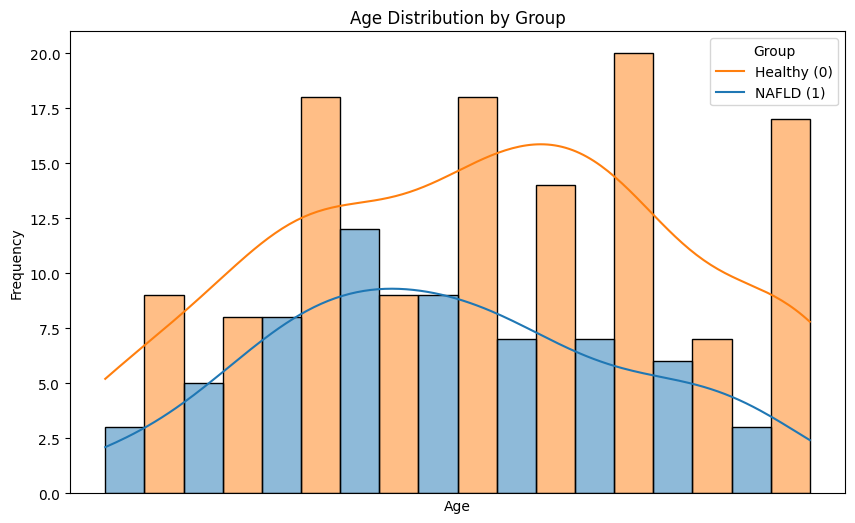

In [41]:
# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ –ø–æ –≥—Ä—É–ø–ø–∞–º
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=combined_df, x="–í–æ–∑—Ä–∞—Å—Ç", hue="Group", multiple="dodge", kde=True)
plt.title("Age Distribution by Group")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(title="Group", labels=["Healthy (0)", "NAFLD (1)"])

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –º–µ—Ç–æ–∫ –Ω–∞ –æ—Å–∏ x
age_ticks = range(int(combined_df["–í–æ–∑—Ä–∞—Å—Ç"].min()), int(combined_df["–í–æ–∑—Ä–∞—Å—Ç"].max()) + 1, 5)  # –®–∞–≥ –º–µ—Ç–æ–∫ 5 –ª–µ—Ç (–Ω–∞—Å—Ç—Ä–∞–∏–≤–∞–µ–º –ø–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏)
ax.set_xticks([])
ax.set_xticklabels([])

plt.show()


In [42]:
mean_age_group_0 = combined_df[combined_df['Group'] == 0]['–í–æ–∑—Ä–∞—Å—Ç'].mean()
mean_age_group_1 = combined_df[combined_df['Group'] == 1]['–í–æ–∑—Ä–∞—Å—Ç'].mean()

mean_age_group_0, mean_age_group_1

(42.03333333333333, 43.625)

## Feature selection

In [43]:
# Define features and target
features = ['–ü–æ–ª', '–í–æ–∑—Ä–∞—Å—Ç', '–û.–∂.,%', '–í–∏—Å—Ü.–∂,%', '–ú—ã—à.–º,%', '–°–∫–µ–ª–µ—Ç,%',
            '–ö–æ—Å—Ç–∏,–∫–≥', '–í–æ–¥–∞,%', '–°–û–û–í,–∫–∫–∞–ª', '–û–ì,—Å–º', '–û–¢,—Å–º', '–û–ñ,—Å–º', '–û–ë,—Å–º',
            '–ò–ú–¢', '–ê–õ–¢', '–ê–°–¢', '–ì–ì–¢–ü', '–©–§', '–•–°–æ–±—â.', '–õ–ü–ù–ü', '–õ–ü–í–ü', '–¢—Ä–∏–≥–ª–∏—Ü.',
            '–ë–∏–ª–∏—Ä.–æ', '–ë–∏–ª–∏—Ä.–ø—Ä', '–ì–ª—é–∫–æ–∑–∞', '–ò–Ω—Å—É–ª–∏–Ω', '–§–µ—Ä—Ä–∏—Ç–∏–Ω', '–°–†–ë',
            '–û.–±–µ–ª–æ–∫', '–ú–æ—á.–∫-—Ç–∞']
target = 'Group'

X = combined_df[features]
y = combined_df[target]

# Add constant for VIF calculation
X_const = sm.add_constant(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif_data = vif_data[vif_data["Feature"] != "const"]  # Remove the constant term
print(vif_data)

# Remove features with high VIF values (e.g., VIF > 5.5)
# High VIF values indicate that a feature is highly correlated with one or more other features in the dataset.

high_vif_features = vif_data[vif_data["VIF"] > 8]["Feature"].tolist()
X = X.drop(columns=high_vif_features)

# Evaluate feature importance with Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
print('\n')
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

      Feature        VIF
1         –ü–æ–ª  10.567238
2     –í–æ–∑—Ä–∞—Å—Ç   2.198152
3      –û.–∂.,%  16.271429
4    –í–∏—Å—Ü.–∂,%   9.664759
5     –ú—ã—à.–º,%  15.461446
6    –°–∫–µ–ª–µ—Ç,%  13.977006
7    –ö–æ—Å—Ç–∏,–∫–≥  13.821221
8      –í–æ–¥–∞,%   5.010207
9   –°–û–û–í,–∫–∫–∞–ª  16.099483
10      –û–ì,—Å–º  10.993683
11      –û–¢,—Å–º  16.624771
12      –û–ñ,—Å–º  19.964443
13      –û–ë,—Å–º   4.528864
14        –ò–ú–¢   7.360842
15        –ê–õ–¢   5.638109
16        –ê–°–¢   5.038837
17       –ì–ì–¢–ü   2.036661
18         –©–§   2.340512
19     –•–°–æ–±—â.   7.420837
20       –õ–ü–ù–ü   7.810826
21       –õ–ü–í–ü   2.383061
22   –¢—Ä–∏–≥–ª–∏—Ü.   2.482251
23    –ë–∏–ª–∏—Ä.–æ   8.837016
24   –ë–∏–ª–∏—Ä.–ø—Ä   8.981900
25    –ì–ª—é–∫–æ–∑–∞   2.721822
26    –ò–Ω—Å—É–ª–∏–Ω   2.506788
27   –§–µ—Ä—Ä–∏—Ç–∏–Ω   2.429168
28        –°–†–ë   2.427326
29    –û.–±–µ–ª–æ–∫   2.013835
30   –ú–æ—á.–∫-—Ç–∞   3.017672


     Feature  Importance
4        –ê–õ–¢    0.256368
5        –ê–°–¢    0.17

In [ ]:
# X = combined_df[features]
# print(X.columns)

# X = X.drop(columns=high_vif_features)
# print(X.columns)

Index(['–ü–æ–ª', '–í–æ–∑—Ä–∞—Å—Ç', '–û.–∂.,%', '–í–∏—Å—Ü.–∂,%', '–ú—ã—à.–º,%', '–°–∫–µ–ª–µ—Ç,%',
       '–ö–æ—Å—Ç–∏,–∫–≥', '–í–æ–¥–∞,%', '–°–û–û–í,–∫–∫–∞–ª', '–û–ì,—Å–º', '–û–¢,—Å–º', '–û–ñ,—Å–º', '–û–ë,—Å–º',
       '–ò–ú–¢', '–ê–õ–¢', '–ê–°–¢', '–ì–ì–¢–ü', '–©–§', '–•–°–æ–±—â.', '–õ–ü–ù–ü', '–õ–ü–í–ü', '–¢—Ä–∏–≥–ª–∏—Ü.',
       '–ë–∏–ª–∏—Ä.–æ', '–ë–∏–ª–∏—Ä.–ø—Ä', '–ì–ª—é–∫–æ–∑–∞', '–ò–Ω—Å—É–ª–∏–Ω', '–§–µ—Ä—Ä–∏—Ç–∏–Ω', '–°–†–ë',
       '–û.–±–µ–ª–æ–∫', '–ú–æ—á.–∫-—Ç–∞'],
      dtype='object')
Index(['–í–æ–∑—Ä–∞—Å—Ç', '–í–æ–¥–∞,%', '–û–ë,—Å–º', '–ò–ú–¢', '–ê–õ–¢', '–ê–°–¢', '–ì–ì–¢–ü', '–©–§',
       '–•–°–æ–±—â.', '–õ–ü–ù–ü', '–õ–ü–í–ü', '–¢—Ä–∏–≥–ª–∏—Ü.', '–ì–ª—é–∫–æ–∑–∞', '–ò–Ω—Å—É–ª–∏–Ω', '–§–µ—Ä—Ä–∏—Ç–∏–Ω',
       '–°–†–ë', '–û.–±–µ–ª–æ–∫', '–ú–æ—á.–∫-—Ç–∞'],
      dtype='object')


In [44]:
# Cross-validation with feature subsets
def evaluate_model(X, y):
    model = RandomForestClassifier(random_state=42)
    scores = cross_val_score(model, X, y, cv=5)
    return scores.mean()

initial_score = evaluate_model(X, y)
print(f'Initial score: {initial_score}')

Initial score: 0.9277777777777778


In [45]:
# List of all highly correlated feature pairs
all_correlated_pairs = [
    ('–ü–æ–ª', '–°–∫–µ–ª–µ—Ç,%'), ('–ü–æ–ª', '–ö–æ—Å—Ç–∏,–∫–≥'), ('–ü–æ–ª', '–°–û–û–í,–∫–∫–∞–ª'), ('–ü–æ–ª', '–û–ì,—Å–º'),
    ('–ü–æ–ª', '–û–¢,—Å–º'), ('–ü–æ–ª', '–û.–±–µ–ª–æ–∫'), ('–û.–∂.,%', '–í–∏—Å—Ü.–∂,%'), ('–û.–∂.,%', '–ú—ã—à.–º,%'),
    ('–û.–∂.,%', '–°–∫–µ–ª–µ—Ç,%'), ('–û.–∂.,%', '–í–æ–¥–∞,%'), ('–û.–∂.,%', '–û–ë,—Å–º'), ('–û.–∂.,%', '–ò–ú–¢'),
    ('–í–∏—Å—Ü.–∂,%', '–û–ì,—Å–º'), ('–í–∏—Å—Ü.–∂,%', '–û–¢,—Å–º'), ('–í–∏—Å—Ü.–∂,%', '–û–ñ,—Å–º'), ('–í–∏—Å—Ü.–∂,%', '–û–ë,—Å–º'),
    ('–í–∏—Å—Ü.–∂,%', '–ò–ú–¢'), ('–í–∏—Å—Ü.–∂,%', '–ê–õ–¢'), ('–í–∏—Å—Ü.–∂,%', '–ê–°–¢'), ('–í–∏—Å—Ü.–∂,%', '–ì–ª—é–∫–æ–∑–∞'),
    ('–í–∏—Å—Ü.–∂,%', '–§–µ—Ä—Ä–∏—Ç–∏–Ω'), ('–í–∏—Å—Ü.–∂,%', '–°–†–ë'), ('–í–∏—Å—Ü.–∂,%', '–ú–æ—á.–∫-—Ç–∞'), ('–í–∏—Å—Ü.–∂,%', 'Group'),
    ('–ú—ã—à.–º,%', '–°–∫–µ–ª–µ—Ç,%'), ('–ú—ã—à.–º,%', '–í–æ–¥–∞,%'), ('–ú—ã—à.–º,%', '–û–ë,—Å–º'), ('–°–∫–µ–ª–µ—Ç,%', '–í–æ–¥–∞,%'),
    ('–ö–æ—Å—Ç–∏,–∫–≥', '–°–û–û–í,–∫–∫–∞–ª'), ('–ö–æ—Å—Ç–∏,–∫–≥', '–û–ì,—Å–º'), ('–ö–æ—Å—Ç–∏,–∫–≥', '–û–¢,—Å–º'), ('–°–û–û–í,–∫–∫–∞–ª', '–û–ì,—Å–º'),
    ('–°–û–û–í,–∫–∫–∞–ª', '–û–¢,—Å–º'), ('–°–û–û–í,–∫–∫–∞–ª', '–û–ñ,—Å–º'), ('–°–û–û–í,–∫–∫–∞–ª', '–ú–æ—á.–∫-—Ç–∞'), ('–û–ì,—Å–º', '–û–¢,—Å–º'),
    ('–û–ì,—Å–º', '–û–ñ,—Å–º'), ('–û–ì,—Å–º', '–ò–ú–¢'), ('–û–¢,—Å–º', '–û–ñ,—Å–º'), ('–û–¢,—Å–º', '–ò–ú–¢'), ('–û–¢,—Å–º', '–ê–õ–¢'),
    ('–û–¢,—Å–º', '–ò–Ω—Å—É–ª–∏–Ω'), ('–û–¢,—Å–º', '–§–µ—Ä—Ä–∏—Ç–∏–Ω'), ('–û–¢,—Å–º', '–°–†–ë'), ('–û–¢,—Å–º', '–ú–æ—á.–∫-—Ç–∞'),
    ('–û–ñ,—Å–º', '–û–ë,—Å–º'), ('–û–ñ,—Å–º', '–ò–ú–¢'), ('–û–ñ,—Å–º', '–ê–õ–¢'), ('–û–ñ,—Å–º', '–ò–Ω—Å—É–ª–∏–Ω'), ('–û–ñ,—Å–º', '–§–µ—Ä—Ä–∏—Ç–∏–Ω'),
    ('–û–ñ,—Å–º', '–°–†–ë'), ('–û–ñ,—Å–º', '–ú–æ—á.–∫-—Ç–∞'), ('–û–ë,—Å–º', '–ò–ú–¢'), ('–ò–ú–¢', '–ú–æ—á.–∫-—Ç–∞'),
    ('–ò–ú–¢', 'Group'), ('–ê–õ–¢', '–ê–°–¢'), ('–ê–õ–¢', '–ì–ì–¢–ü'), ('–ê–õ–¢', 'Group'), ('–ê–°–¢', 'Group'),
    ('–•–°–æ–±—â.', '–õ–ü–ù–ü'), ('–õ–ü–ù–ü', '–õ–ü–í–ü'), ('–ë–∏–ª–∏—Ä.–æ', '–ë–∏–ª–∏—Ä.–ø—Ä'), ('–ò–Ω—Å—É–ª–∏–Ω', '–°–†–ë'),
    ('–ò–Ω—Å—É–ª–∏–Ω', '–ú–æ—á.–∫-—Ç–∞')
]

# Remove pairs that include 'Group'
correlated_pairs = [pair for pair in all_correlated_pairs if 'Group' not in pair]


best_features = X.columns.tolist()
best_score = initial_score
#best_features = best_features[1:]

In [46]:
for pair in correlated_pairs:
    for feature in pair:
        if feature in best_features:
            temp_features = best_features[:]
            temp_features.remove(feature)
            temp_score = evaluate_model(combined_df[temp_features], y)
            #print(f'Score after removing {feature}: {temp_score}')
            if temp_score > best_score:
                best_score = temp_score
                best_features = temp_features

print(f'Best score: {best_score}')
print(f'Best features: {best_features}')

# Final model with selected features
final_model = RandomForestClassifier(random_state=42)
final_model.fit(combined_df[best_features], y)

# Evaluate the final model
final_score = evaluate_model(combined_df[best_features], y)
print(f'Final cross-validated score: {final_score}')

Best score: 0.9277777777777778
Best features: ['–í–æ–∑—Ä–∞—Å—Ç', '–í–æ–¥–∞,%', '–û–ë,—Å–º', '–ò–ú–¢', '–ê–õ–¢', '–ê–°–¢', '–ì–ì–¢–ü', '–©–§', '–•–°–æ–±—â.', '–õ–ü–ù–ü', '–õ–ü–í–ü', '–¢—Ä–∏–≥–ª–∏—Ü.', '–ì–ª—é–∫–æ–∑–∞', '–ò–Ω—Å—É–ª–∏–Ω', '–§–µ—Ä—Ä–∏—Ç–∏–Ω', '–°–†–ë', '–û.–±–µ–ª–æ–∫', '–ú–æ—á.–∫-—Ç–∞']
Final cross-validated score: 0.9277777777777778


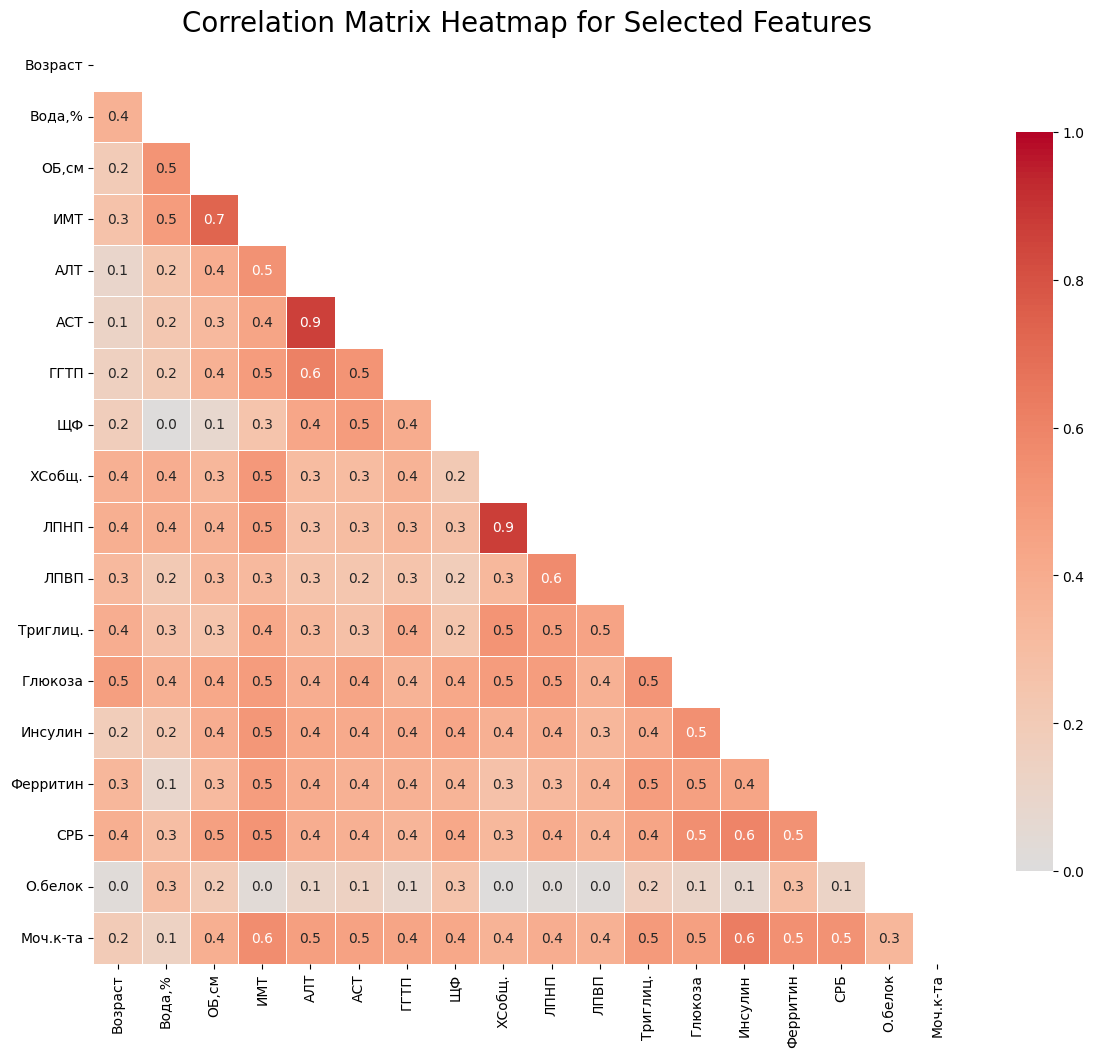

In [47]:
# Filter the DataFrame to include only the selected features
filtered_df = combined_df[best_features]

# Compute the absolute correlation matrix
correlation_matrix = filtered_df.corr().abs()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))  # Bigger figure size

# Draw the heatmap with the mask
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.1f',
                      linewidths=0.5, vmin=0, vmax=1, mask=mask,
                      cbar_kws={"shrink": .8})  # Add colorbar with smaller shrinkage

# Adjust font size
plt.title('Correlation Matrix Heatmap for Selected Features', size=20)  # Bigger title
plt.xticks(size=10)  # Smaller x-axis labels
plt.yticks(size=10)  # Smaller y-axis labels

# Display the plot
plt.show()

### Model with selecte features + standartization

In [48]:
# Selected features
selected_features = best_features

# Separate features and target
X = combined_df[selected_features]
y = combined_df['Group']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_normalized, y)

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        37
           1       0.94      0.83      0.88        35

    accuracy                           0.89        72
   macro avg       0.89      0.89      0.89        72
weighted avg       0.89      0.89      0.89        72



In [ ]:
# Evaluate feature importance in logistic regression
importances = model.coef_[0]
feature_importance = pd.Series(importances, index=selected_features).sort_values(ascending=False)
print("Feature Importances:\n", feature_importance)

# Adjust coefficients to reflect the original scale
intercept = model.intercept_
coefficients = model.coef_[0]

# Adjust coefficients based on the scaler
adjusted_coefficients = coefficients / scaler.scale_
adjusted_intercept = intercept - np.sum((scaler.mean_ / scaler.scale_) * coefficients)

print(f'\nAdjusted Intercept: {adjusted_intercept}')
print(f'\nAdjusted Coefficients: {adjusted_coefficients}')

# Display regression equation
equation = f"NLFD Prediction = {adjusted_intercept[0]} "
for coef, feature in zip(adjusted_coefficients, selected_features):
    equation += f"+ ({coef} * {feature}) "
print(f'\nRegression Equation: {equation}')

Feature Importances:
 –ê–õ–¢         2.217510
–ê–°–¢         1.326454
–ò–ú–¢         1.293499
–ì–ì–¢–ü        1.047364
–ú–æ—á.–∫-—Ç–∞    0.767122
–•–°–æ–±—â.      0.645615
–û–ë,—Å–º       0.595769
–©–§          0.339665
–¢—Ä–∏–≥–ª–∏—Ü.    0.264766
–°–†–ë        -0.019475
–ì–ª—é–∫–æ–∑–∞    -0.078182
–õ–ü–í–ü       -0.168647
–ò–Ω—Å—É–ª–∏–Ω    -0.279961
–§–µ—Ä—Ä–∏—Ç–∏–Ω   -0.595700
–í–æ–¥–∞,%     -0.621175
–í–æ–∑—Ä–∞—Å—Ç    -0.782200
–õ–ü–ù–ü       -1.106663
–û.–±–µ–ª–æ–∫    -1.233156
dtype: float64

Adjusted Intercept: [0.97018323]

Adjusted Coefficients: [-0.08072219 -0.13235429  0.07017954  0.30703425  0.09921889  0.08021237
  0.05570663  0.01532023  0.75921496 -1.07056487 -0.46508156  0.31828527
 -0.1219454  -0.03920512 -0.00449437 -0.00783805 -0.23358184  0.00737954]

Regression Equation: NLFD Prediction = 0.970183225705822 + (-0.08072219465413848 * –í–æ–∑—Ä–∞—Å—Ç) + (-0.1323542936747224 * –í–æ–¥–∞,%) + (0.0701795367692182 * –û–ë,—Å–º) + (0.30703425454321354 * –ò–ú–¢) + (0.0992188890

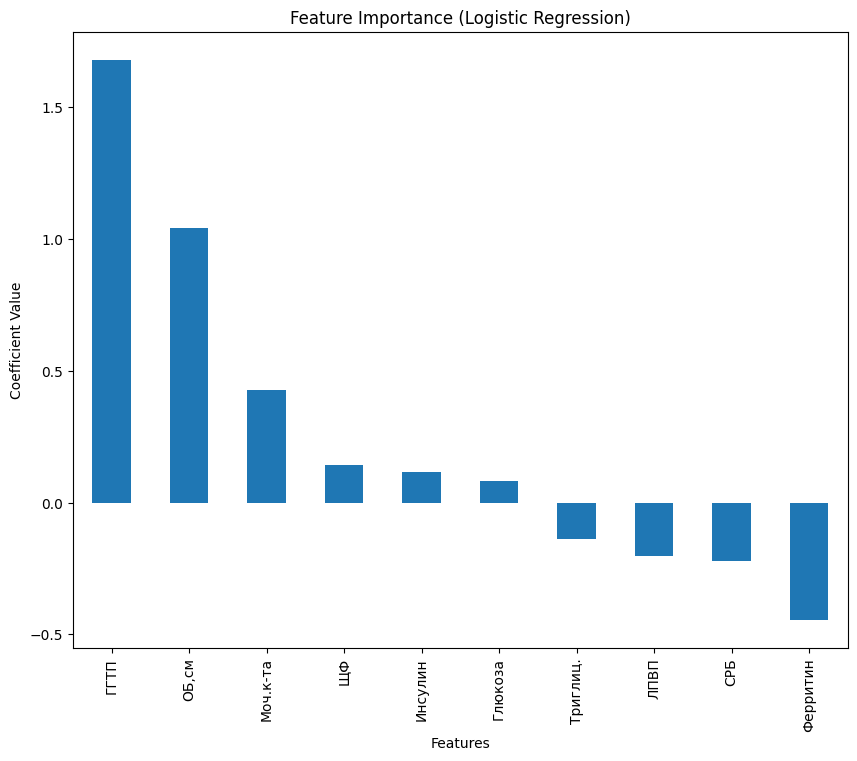

In [ ]:
plt.figure(figsize=(10, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

In [ ]:
def calculate_nlfd_prediction(age, water, ob_sm, ast, ggtp, shf, lpvp, triglyc, glucose, insulin, ferritin, crb, uric_acid):
    # Define the coefficients from the regression equation
    intercept = -5.421066848582185
    coefficients = {
        '–í–æ–∑—Ä–∞—Å—Ç': -0.06509373369732464,
        '–í–æ–¥–∞,%': -0.17554066261143356,
        '–û–ë,—Å–º': 0.09460989753365498,
        '–ê–°–¢': 0.14550569646818545,
        '–ì–ì–¢–ü': 0.06779493212863329,
        '–©–§': 0.0026030293715542776,
        '–õ–ü–í–ü': 0.2598572047980786,
        '–¢—Ä–∏–≥–ª–∏—Ü.': 0.12273007714495547,
        '–ì–ª—é–∫–æ–∑–∞': -0.09116393396371184,
        '–ò–Ω—Å—É–ª–∏–Ω': 0.003938323934870056,
        '–§–µ—Ä—Ä–∏—Ç–∏–Ω': -0.0018760460017536282,
        '–°–†–ë': 0.027384640575055314,
        '–ú–æ—á.–∫-—Ç–∞': 0.001223334236025924
    }

    # Calculate the prediction using the provided values
    prediction = intercept
    prediction += coefficients['–í–æ–∑—Ä–∞—Å—Ç'] * age
    prediction += coefficients['–í–æ–¥–∞,%'] * water
    prediction += coefficients['–û–ë,—Å–º'] * ob_sm
    prediction += coefficients['–ê–°–¢'] * ast
    prediction += coefficients['–ì–ì–¢–ü'] * ggtp
    prediction += coefficients['–©–§'] * shf
    prediction += coefficients['–õ–ü–í–ü'] * lpvp
    prediction += coefficients['–¢—Ä–∏–≥–ª–∏—Ü.'] * triglyc
    prediction += coefficients['–ì–ª—é–∫–æ–∑–∞'] * glucose
    prediction += coefficients['–ò–Ω—Å—É–ª–∏–Ω'] * insulin
    prediction += coefficients['–§–µ—Ä—Ä–∏—Ç–∏–Ω'] * ferritin
    prediction += coefficients['–°–†–ë'] * crb
    prediction += coefficients['–ú–æ—á.–∫-—Ç–∞'] * uric_acid

    # Apply the sigmoid function to transform the result to a probability between 0 and 1
    from scipy.special import expit
    p_value = expit(prediction)

    return p_value

def main():
    # Input values from the user
    age = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –í–æ–∑—Ä–∞—Å—Ç: "))
    water = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –í–æ–¥–∞,%: "))
    ob_sm = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –û–ë,—Å–º: "))
    ast = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ê–°–¢: "))
    ggtp = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ì–ì–¢–ü: "))
    shf = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –©–§: "))
    lpvp = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –õ–ü–í–ü: "))
    triglyc = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –¢—Ä–∏–≥–ª–∏—Ü.: "))
    glucose = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ì–ª—é–∫–æ–∑–∞: "))
    insulin = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ò–Ω—Å—É–ª–∏–Ω: "))
    ferritin = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –§–µ—Ä—Ä–∏—Ç–∏–Ω: "))
    crb = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –°–†–ë: "))
    uric_acid = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ú–æ—á.–∫-—Ç–∞: "))

    # Calculate the prediction
    p_value = calculate_nlfd_prediction(age, water, ob_sm, ast, ggtp, shf, lpvp, triglyc, glucose, insulin, ferritin, crb, uric_acid)

    # Print the result
    print(f"NLFD Prediction probability (p) = {p_value:.4f}")

if __name__ == "__main__":
    main()

–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –í–æ–∑—Ä–∞—Å—Ç: 58
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –í–æ–¥–∞,%: 38.3
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –û–ë,—Å–º: 114
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ê–°–¢: 46.8
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ì–ì–¢–ü: 39.6
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –©–§: 69
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –õ–ü–í–ü: 1.24
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –¢—Ä–∏–≥–ª–∏—Ü.: 3.28
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ì–ª—é–∫–æ–∑–∞: 6.2
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ò–Ω—Å—É–ª–∏–Ω: 26.8
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –§–µ—Ä—Ä–∏—Ç–∏–Ω: 327.4
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –°–†–ë: 7.2
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ú–æ—á.–∫-—Ç–∞: 397.5
NLFD Prediction probability (p) = 0.9924


### Same without Insulin

In [ ]:
# Define the best features excluding '–ò–Ω—Å—É–ª–∏–Ω'
selected_features = ['–í–æ–∑—Ä–∞—Å—Ç', '–í–æ–¥–∞,%', '–û–ë,—Å–º', '–ê–°–¢', '–ì–ì–¢–ü', '–©–§', '–õ–ü–í–ü', '–¢—Ä–∏–≥–ª–∏—Ü.', '–ì–ª—é–∫–æ–∑–∞', '–§–µ—Ä—Ä–∏—Ç–∏–Ω', '–°–†–ë', '–ú–æ—á.–∫-—Ç–∞']

# Separate features and target
X = combined_df[selected_features]
y = combined_df['Group']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_normalized, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        37
           1       0.85      0.80      0.82        35

    accuracy                           0.83        72
   macro avg       0.83      0.83      0.83        72
weighted avg       0.83      0.83      0.83        72



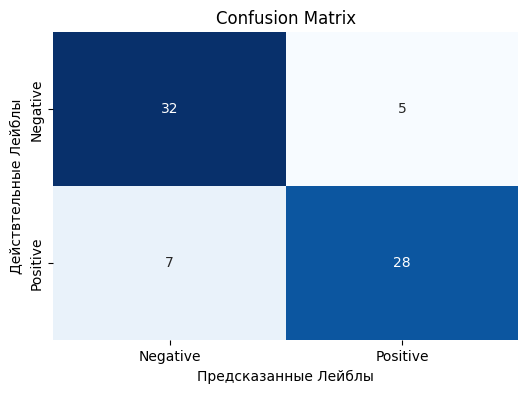

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –õ–µ–π–±–ª—ã')
plt.ylabel('–î–µ–π—Å—Ç–≤—Ç–µ–ª—å–Ω—ã–µ –õ–µ–π–±–ª—ã')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluate feature importance in logistic regression
importances = model.coef_[0]
feature_importance = pd.Series(importances, index=selected_features).sort_values(ascending=False)
print("Feature Importances:\n", feature_importance)

# Adjust coefficients to reflect the original scale
intercept = model.intercept_
coefficients = model.coef_[0]

# Adjust coefficients based on the scaler
adjusted_coefficients = coefficients / scaler.scale_
adjusted_intercept = intercept - np.sum((scaler.mean_ / scaler.scale_) * coefficients)

print(f'\nAdjusted Intercept: {adjusted_intercept}')
print(f'\nAdjusted Coefficients: {adjusted_coefficients}')


Feature Importances:
 –ê–°–¢         2.459092
–ì–ì–¢–ü        1.279452
–û–ë,—Å–º       0.799488
–ú–æ—á.–∫-—Ç–∞    0.135015
–¢—Ä–∏–≥–ª–∏—Ü.    0.088755
–õ–ü–í–ü        0.080504
–©–§          0.057727
–°–†–ë         0.056614
–ì–ª—é–∫–æ–∑–∞    -0.091911
–§–µ—Ä—Ä–∏—Ç–∏–Ω   -0.238462
–í–æ–∑—Ä–∞—Å—Ç    -0.606204
–í–æ–¥–∞,%     -0.860568
dtype: float64

Adjusted Intercept: [-4.80458174]

Adjusted Coefficients: [-0.06255957 -0.18336185  0.09417697  0.14870444  0.06805077  0.0026037
  0.22200817  0.10669549 -0.14335935 -0.00179912  0.02278571  0.00129882]



Regression Equation: NLFD Prediction = -4.80458173575915 + (-0.06255957169222563 * –í–æ–∑—Ä–∞—Å—Ç) + (-0.18336184536619551 * –í–æ–¥–∞,%) + (0.09417696828243437 * –û–ë,—Å–º) + (0.14870443677498993 * –ê–°–¢) + (0.06805077475941315 * –ì–ì–¢–ü) + (0.0026037003017784946 * –©–§) + (0.22200816698799253 * –õ–ü–í–ü) + (0.1066954909253985 * –¢—Ä–∏–≥–ª–∏—Ü.) + (-0.14335935464306612 * –ì–ª—é–∫–æ–∑–∞) + (-0.0017991231708034488 * –§–µ—Ä—Ä–∏—Ç–∏–Ω) + (0.022785710084822646 * –°–†–ë) + (0.001298817067548743 * –ú–æ—á.–∫-—Ç–∞) 


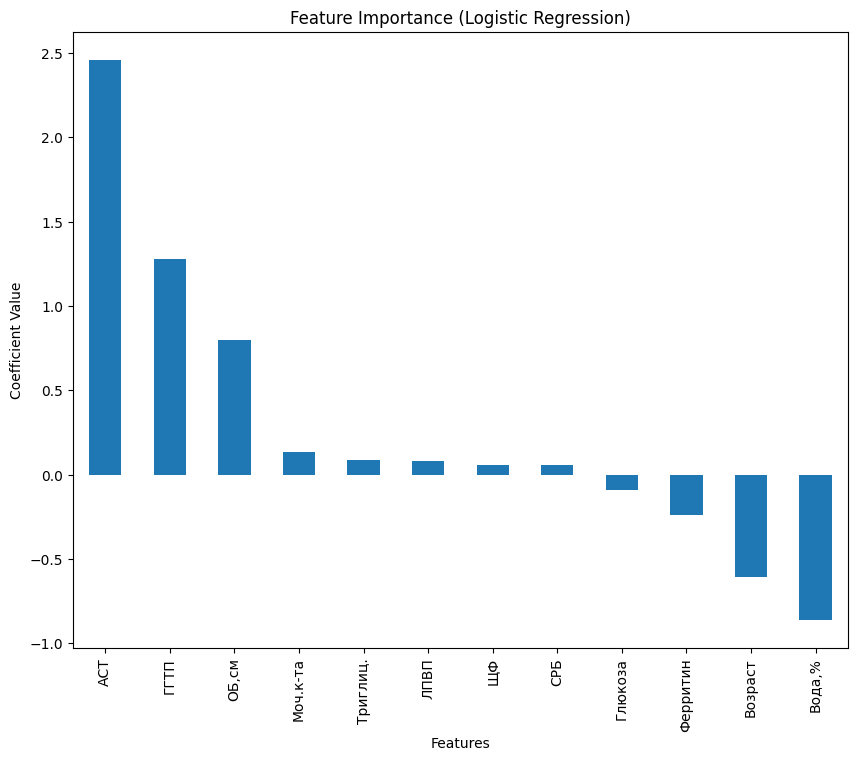

In [ ]:
# Display regression equation
equation = f"NLFD Prediction = {adjusted_intercept[0]} "
for coef, feature in zip(adjusted_coefficients, selected_features):
    equation += f"+ ({coef} * {feature}) "
print(f'\nRegression Equation: {equation}')

# Plot feature importance
plt.figure(figsize=(10, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

In [ ]:
# Function to calculate NLFD Prediction
def calculate_nlfd_prediction(age, water, ob_sm, ast, ggtp, shf, lpvp, triglyc, glucose, ferritin, crb, uric_acid):
    # Define the coefficients from the regression equation
    intercept = adjusted_intercept[0]
    coefficients = {
        '–í–æ–∑—Ä–∞—Å—Ç': adjusted_coefficients[0],
        '–í–æ–¥–∞,%': adjusted_coefficients[1],
        '–û–ë,—Å–º': adjusted_coefficients[2],
        '–ê–°–¢': adjusted_coefficients[3],
        '–ì–ì–¢–ü': adjusted_coefficients[4],
        '–©–§': adjusted_coefficients[5],
        '–õ–ü–í–ü': adjusted_coefficients[6],
        '–¢—Ä–∏–≥–ª–∏—Ü.': adjusted_coefficients[7],
        '–ì–ª—é–∫–æ–∑–∞': adjusted_coefficients[8],
        '–§–µ—Ä—Ä–∏—Ç–∏–Ω': adjusted_coefficients[9],
        '–°–†–ë': adjusted_coefficients[10],
        '–ú–æ—á.–∫-—Ç–∞': adjusted_coefficients[11]
    }

    # Calculate the prediction using the provided values
    prediction = intercept
    prediction += coefficients['–í–æ–∑—Ä–∞—Å—Ç'] * age
    prediction += coefficients['–í–æ–¥–∞,%'] * water
    prediction += coefficients['–û–ë,—Å–º'] * ob_sm
    prediction += coefficients['–ê–°–¢'] * ast
    prediction += coefficients['–ì–ì–¢–ü'] * ggtp
    prediction += coefficients['–©–§'] * shf
    prediction += coefficients['–õ–ü–í–ü'] * lpvp
    prediction += coefficients['–¢—Ä–∏–≥–ª–∏—Ü.'] * triglyc
    prediction += coefficients['–ì–ª—é–∫–æ–∑–∞'] * glucose
    prediction += coefficients['–§–µ—Ä—Ä–∏—Ç–∏–Ω'] * ferritin
    prediction += coefficients['–°–†–ë'] * crb
    prediction += coefficients['–ú–æ—á.–∫-—Ç–∞'] * uric_acid

    #from scipy.special import expit
    p_value = expit(prediction)

    return p_value
3
def main():
    # Input values from the user
    age = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –í–æ–∑—Ä–∞—Å—Ç: "))
    water = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –í–æ–¥–∞,%: "))
    ob_sm = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –û–ë,—Å–º: "))
    ast = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ê–°–¢: "))
    ggtp = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ì–ì–¢–ü: "))
    shf = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –©–§: "))
    lpvp = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –õ–ü–í–ü: "))
    triglyc = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –¢—Ä–∏–≥–ª–∏—Ü.: "))
    glucose = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ì–ª—é–∫–æ–∑–∞: "))
    ferritin = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –§–µ—Ä—Ä–∏—Ç–∏–Ω: "))
    crb = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –°–†–ë: "))
    uric_acid = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ú–æ—á.–∫-—Ç–∞: "))

    # Calculate the prediction
    p_value = calculate_nlfd_prediction(age, water, ob_sm, ast, ggtp, shf, lpvp, triglyc, glucose, ferritin, crb, uric_acid)

    # Print the result
    print(f"NLFD Prediction probability (p) = {p_value:.4f}")

if __name__ == "__main__":
    main()

–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –í–æ–∑—Ä–∞—Å—Ç: 33
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –í–æ–¥–∞,%: 3
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –û–ë,—Å–º: 3
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ê–°–¢: 3
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ì–ì–¢–ü: 3
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –©–§: 3
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –õ–ü–í–ü: 33
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –¢—Ä–∏–≥–ª–∏—Ü.: 3
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ì–ª—é–∫–æ–∑–∞: 3
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –§–µ—Ä—Ä–∏—Ç–∏–Ω: 3
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –°–†–ë: 33
–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ú–æ—á.–∫-—Ç–∞: 33
NLFD Prediction probability (p) = 0.8216


In [ ]:
def calculate_nlfd_prediction(age, water, ob_sm, ast, ggtp, shf, lpvp, triglyc, glucose, ferritin, crb, uric_acid):

    intercept = adjusted_intercept[0]

    coefficients = {
        '–í–æ–∑—Ä–∞—Å—Ç': adjusted_coefficients[0],
        '–í–æ–¥–∞,%': adjusted_coefficients[1],
        '–û–ë,—Å–º': adjusted_coefficients[2],
        '–ê–°–¢': adjusted_coefficients[3],
        '–ì–ì–¢–ü': adjusted_coefficients[4],
        '–©–§': adjusted_coefficients[5],
        '–õ–ü–í–ü': adjusted_coefficients[6],
        '–¢—Ä–∏–≥–ª–∏—Ü.': adjusted_coefficients[7],
        '–ì–ª—é–∫–æ–∑–∞': adjusted_coefficients[8],
        '–§–µ—Ä—Ä–∏—Ç–∏–Ω': adjusted_coefficients[9],
        '–°–†–ë': adjusted_coefficients[10],
        '–ú–æ—á.–∫-—Ç–∞': adjusted_coefficients[11]
    }

    # –í—ã—á–∏—Å–ª–∏—Ç–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ –æ—Å–Ω–æ–≤–µ –≤–≤–µ–¥–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
    prediction = intercept
    prediction += coefficients['–í–æ–∑—Ä–∞—Å—Ç'] * age
    prediction += coefficients['–í–æ–¥–∞,%'] * water
    prediction += coefficients['–û–ë,—Å–º'] * ob_sm
    prediction += coefficients['–ê–°–¢'] * ast
    prediction += coefficients['–ì–ì–¢–ü'] * ggtp
    prediction += coefficients['–©–§'] * shf
    prediction += coefficients['–õ–ü–í–ü'] * lpvp
    prediction += coefficients['–¢—Ä–∏–≥–ª–∏—Ü.'] * triglyc
    prediction += coefficients['–ì–ª—é–∫–æ–∑–∞'] * glucose
    prediction += coefficients['–§–µ—Ä—Ä–∏—Ç–∏–Ω'] * ferritin
    prediction += coefficients['–°–†–ë'] * crb
    prediction += coefficients['–ú–æ—á.–∫-—Ç–∞'] * uric_acid

    # –ü—Ä–∏–º–µ–Ω–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é —Å–∏–≥–º–æ–∏–¥–∞ –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ –≤ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç 0 –¥–æ 1
    p_value = expit(prediction)

    return p_value

df = dataframes[0]  # –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ —ç—Ç–æ –≤–∞—à DataFrame

# –í—ã–±–µ—Ä–∏—Ç–µ –Ω—É–∂–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã
selected_columns = ['–í–æ–∑—Ä–∞—Å—Ç', '–í–æ–¥–∞,%', '–û–ë,—Å–º', '–ê–°–¢', '–ì–ì–¢–ü', '–©–§', '–õ–ü–í–ü', '–¢—Ä–∏–≥–ª–∏—Ü.', '–ì–ª—é–∫–æ–∑–∞', '–§–µ—Ä—Ä–∏—Ç–∏–Ω', '–°–†–ë', '–ú–æ—á.–∫-—Ç–∞']

# –ü—Ä–æ–≤–µ—Ä—å—Ç–µ, –µ—Å—Ç—å –ª–∏ –≤—Å–µ –Ω—É–∂–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã –≤ DataFrame
for col in selected_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' is missing from the DataFrame")

df['NLFD_Prediction'] = df.apply(lambda row: calculate_nlfd_prediction(
    row['–í–æ–∑—Ä–∞—Å—Ç'],
    row['–í–æ–¥–∞,%'],
    row['–û–ë,—Å–º'],
    row['–ê–°–¢'],
    row['–ì–ì–¢–ü'],
    row['–©–§'],
    row['–õ–ü–í–ü'],
    row['–¢—Ä–∏–≥–ª–∏—Ü.'],
    row['–ì–ª—é–∫–æ–∑–∞'],
    row['–§–µ—Ä—Ä–∏—Ç–∏–Ω'],
    row['–°–†–ë'],
    row['–ú–æ—á.–∫-—Ç–∞']
), axis=1)

print(df[['–§–ò–û', 'NLFD_Prediction']])

                                –§–ò–û  NLFD_Prediction
0      –ß–∞–ª–∏–∫–æ–≤–∞ –í–∏–∫—Ç–æ—Ä–∏—è –í–∞–ª–µ—Ä—å–µ–≤–Ω–∞         0.893100
1   –°–∏–¥–æ—Ä–æ–≤–∞ –ï–∫–∞—Ç–µ—Ä–∏–Ω–∞ –í–ª–∞–¥–∏–º–∏—Ä–æ–≤–Ω–∞         0.579591
2        –ö—É–∑–Ω–µ—Ü–æ–≤–∞ –û–ª—å–≥–∞ –ù–∏–∫–æ–ª–∞–µ–≤–Ω–∞         0.994138
3            –ü–æ–ø–æ–≤ –ê–Ω–¥—Ä–µ–π –ê–Ω–¥—Ä–µ–µ–≤–∏—á         0.721738
4         –ê–Ω–¥—Ä–æ–Ω–æ–≤–∞ –ú–∞—Ä–∏–Ω–∞ –ö–∞—Ä–ª–æ–≤–Ω–∞         0.998675
5     –ó–∞–π—Ü–µ–≤–∞ –°–≤–µ—Ç–ª–∞–Ω–∞ –í—è—á–µ—Å–ª–∞–≤–æ–≤–Ω–∞         0.992910
6     –ó–∞–π—Ü–µ–≤ –ê–ª–µ–∫—Å–∞–Ω–¥—Ä –í—è—á–µ—Å–ª–∞–≤–æ–≤–∏—á         0.795565
7      –°–∞–ª—å–Ω–∏–∫–æ–≤ –ê–Ω–¥—Ä–µ–π –ê–Ω–∞—Ç–æ–ª—å–µ–≤–∏—á         0.960828
8         –ö–æ–∑–ª–æ–≤–∞ –û–∫—Å–∞–Ω–∞ –ì–µ–æ—Ä–≥–∏–µ–≤–Ω–∞         0.928297
9        –ë–µ–ª—è–∫–æ–≤–∞ –¢–∞—Ç—å—è–Ω–∞ –ë–æ—Ä–∏—Å–æ–≤–Ω–∞         0.739512
10          –°–∞–≤–≤–∞ –î–º–∏—Ç—Ä–∏–π –ê–Ω–¥—Ä–µ–µ–≤–∏—á         0.997665
11      –¢—É—Ñ–∞–Ω–æ–≤ –î–º–∏—Ç—Ä–∏–π –ê–Ω–∞—Ç–æ–ª—å–µ–≤–∏—á         0.999823
12        –í–

### Same without Ferritin

In [ ]:
# Define the best features excluding '–ò–Ω—Å—É–ª–∏–Ω'
selected_features = ['–í–æ–∑—Ä–∞—Å—Ç', '–í–æ–¥–∞,%', '–û–ë,—Å–º', '–ê–°–¢', '–ì–ì–¢–ü', '–©–§', '–õ–ü–í–ü', '–¢—Ä–∏–≥–ª–∏—Ü.', '–ì–ª—é–∫–æ–∑–∞', '–ò–Ω—Å—É–ª–∏–Ω', '–°–†–ë', '–ú–æ—á.–∫-—Ç–∞']

# Separate features and target
X = combined_df[selected_features]
y = combined_df['Group']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_normalized, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8611111111111112
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        37
           1       0.86      0.86      0.86        35

    accuracy                           0.86        72
   macro avg       0.86      0.86      0.86        72
weighted avg       0.86      0.86      0.86        72



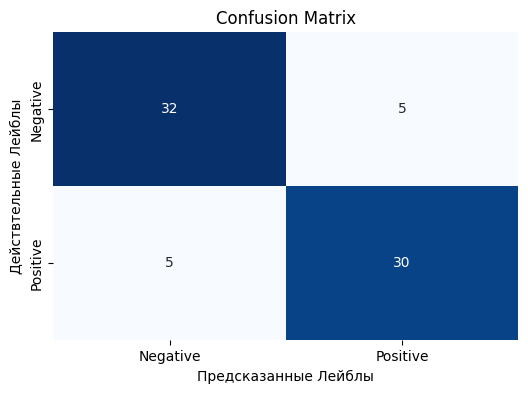

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –õ–µ–π–±–ª—ã')
plt.ylabel('–î–µ–π—Å—Ç–≤—Ç–µ–ª—å–Ω—ã–µ –õ–µ–π–±–ª—ã')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluate feature importance in logistic regression
importances = model.coef_[0]
feature_importance = pd.Series(importances, index=selected_features).sort_values(ascending=False)
print("Feature Importances:\n", feature_importance)

# Adjust coefficients to reflect the original scale
intercept = model.intercept_
coefficients = model.coef_[0]

# Adjust coefficients based on the scaler
adjusted_coefficients = coefficients / scaler.scale_
adjusted_intercept = intercept - np.sum((scaler.mean_ / scaler.scale_) * coefficients)

print(f'\nAdjusted Intercept: {adjusted_intercept}')
print(f'\nAdjusted Coefficients: {adjusted_coefficients}')


Feature Importances:
 –ê–°–¢         2.425204
–ì–ì–¢–ü        1.161559
–û–ë,—Å–º       0.821532
–õ–ü–í–ü        0.162830
–¢—Ä–∏–≥–ª–∏—Ü.    0.137347
–©–§          0.082917
–ú–æ—á.–∫-—Ç–∞    0.066410
–°–†–ë         0.026649
–ò–Ω—Å—É–ª–∏–Ω    -0.052332
–ì–ª—é–∫–æ–∑–∞    -0.077900
–í–æ–∑—Ä–∞—Å—Ç    -0.676552
–í–æ–¥–∞,%     -0.870144
dtype: float64

Adjusted Intercept: [-5.00539785]

Adjusted Coefficients: [-0.06981945 -0.18540215  0.09677368  0.14665519  0.06178033  0.00373989
  0.44904203  0.16511039 -0.12150596 -0.00732848  0.01072543  0.00063885]


In [ ]:
# –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ —Å–ø–∏—Å–æ–∫ –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
selected_features = ['–í–æ–∑—Ä–∞—Å—Ç', '–í–æ–¥–∞,%', '–û–ë,—Å–º', '–ê–°–¢', '–ì–ì–¢–ü', '–©–§', '–õ–ü–í–ü', '–¢—Ä–∏–≥–ª–∏—Ü.', '–ì–ª—é–∫–æ–∑–∞', '–ò–Ω—Å—É–ª–∏–Ω', '–°–†–ë', '–ú–æ—á.–∫-—Ç–∞']

# –û—Ü–µ–Ω–∏—Ç–µ –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
importances = model.coef_[0]
feature_importance = pd.Series(importances, index=selected_features).sort_values(ascending=False)
print("Feature Importances:\n", feature_importance)

# –û—Ç–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É–π—Ç–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –º–∞—Å—à—Ç–∞–±–æ–º
intercept = model.intercept_
coefficients = model.coef_[0]

# –û—Ç–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É–π—Ç–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –Ω–∞ –æ—Å–Ω–æ–≤–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤—â–∏–∫–∞
adjusted_coefficients = coefficients / scaler.scale_
adjusted_intercept = intercept - np.sum((scaler.mean_ / scaler.scale_) * coefficients)

# –°–æ–∑–¥–∞–π—Ç–µ Series –¥–ª—è –æ—Ç–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Å –ø—Ä–∞–≤–∏–ª—å–Ω—ã–º –ø–æ—Ä—è–¥–∫–æ–º
adjusted_feature_importance = pd.Series(adjusted_coefficients, index=selected_features)

print(f'\nAdjusted Intercept: {adjusted_intercept}')
print(f'\nAdjusted Coefficients:\n{adjusted_feature_importance}')


Feature Importances:
 –ê–°–¢         2.425204
–ì–ì–¢–ü        1.161559
–û–ë,—Å–º       0.821532
–õ–ü–í–ü        0.162830
–¢—Ä–∏–≥–ª–∏—Ü.    0.137347
–©–§          0.082917
–ú–æ—á.–∫-—Ç–∞    0.066410
–°–†–ë         0.026649
–ò–Ω—Å—É–ª–∏–Ω    -0.052332
–ì–ª—é–∫–æ–∑–∞    -0.077900
–í–æ–∑—Ä–∞—Å—Ç    -0.676552
–í–æ–¥–∞,%     -0.870144
dtype: float64

Adjusted Intercept: [-5.00539785]

Adjusted Coefficients:
–í–æ–∑—Ä–∞—Å—Ç    -0.069819
–í–æ–¥–∞,%     -0.185402
–û–ë,—Å–º       0.096774
–ê–°–¢         0.146655
–ì–ì–¢–ü        0.061780
–©–§          0.003740
–õ–ü–í–ü        0.449042
–¢—Ä–∏–≥–ª–∏—Ü.    0.165110
–ì–ª—é–∫–æ–∑–∞    -0.121506
–ò–Ω—Å—É–ª–∏–Ω    -0.007328
–°–†–ë         0.010725
–ú–æ—á.–∫-—Ç–∞    0.000639
dtype: float64



Regression Equation: NLFD Prediction = -5.005397854747484 + (-0.06981945326045687 * –í–æ–∑—Ä–∞—Å—Ç) + (-0.1854021508901687 * –í–æ–¥–∞,%) + (0.0967736832391247 * –û–ë,—Å–º) + (0.14665519457329795 * –ê–°–¢) + (0.061780329529438016 * –ì–ì–¢–ü) + (0.0037398944901428834 * –©–§) + (0.4490420299650244 * –õ–ü–í–ü) + (0.16511039299127936 * –¢—Ä–∏–≥–ª–∏—Ü.) + (-0.12150595853444097 * –ì–ª—é–∫–æ–∑–∞) + (-0.007328477122791528 * –ò–Ω—Å—É–ª–∏–Ω) + (0.010725427953490818 * –°–†–ë) + (0.0006388470953869965 * –ú–æ—á.–∫-—Ç–∞) 


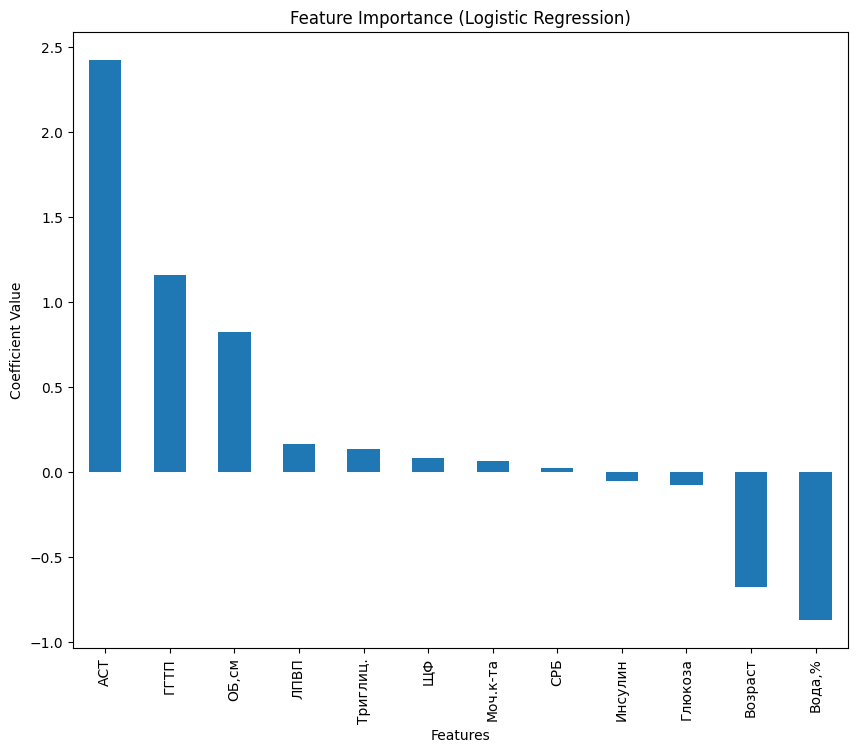

In [ ]:
# Display regression equation
equation = f"NLFD Prediction = {adjusted_intercept[0]} "
for coef, feature in zip(adjusted_coefficients, selected_features):
    equation += f"+ ({coef} * {feature}) "
print(f'\nRegression Equation: {equation}')

# Plot feature importance
plt.figure(figsize=(10, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

In [ ]:
# Function to calculate NLFD Prediction
def calculate_nlfd_prediction(age, water, ob_sm, ast, ggtp, shf, lpvp, triglyc, glucose, insulin, crb, uric_acid):
    # Define the coefficients from the regression equation
    intercept = adjusted_intercept[0]
    coefficients = {
        '–í–æ–∑—Ä–∞—Å—Ç': adjusted_coefficients[0],
        '–í–æ–¥–∞,%': adjusted_coefficients[1],
        '–û–ë,—Å–º': adjusted_coefficients[2],
        '–ê–°–¢': adjusted_coefficients[3],
        '–ì–ì–¢–ü': adjusted_coefficients[4],
        '–©–§': adjusted_coefficients[5],
        '–õ–ü–í–ü': adjusted_coefficients[6],
        '–¢—Ä–∏–≥–ª–∏—Ü.': adjusted_coefficients[7],
        '–ì–ª—é–∫–æ–∑–∞': adjusted_coefficients[8],
        '–ò–Ω—Å—É–ª–∏–Ω': adjusted_coefficients[9],
        '–°–†–ë': adjusted_coefficients[10],
        '–ú–æ—á.–∫-—Ç–∞': adjusted_coefficients[11]
    }

    # Calculate the prediction using the provided values
    prediction = intercept
    prediction += coefficients['–í–æ–∑—Ä–∞—Å—Ç'] * age
    prediction += coefficients['–í–æ–¥–∞,%'] * water
    prediction += coefficients['–û–ë,—Å–º'] * ob_sm
    prediction += coefficients['–ê–°–¢'] * ast
    prediction += coefficients['–ì–ì–¢–ü'] * ggtp
    prediction += coefficients['–©–§'] * shf
    prediction += coefficients['–õ–ü–í–ü'] * lpvp
    prediction += coefficients['–¢—Ä–∏–≥–ª–∏—Ü.'] * triglyc
    prediction += coefficients['–ì–ª—é–∫–æ–∑–∞'] * glucose
    prediction += coefficients['–ò–Ω—Å—É–ª–∏–Ω'] * insulin
    prediction += coefficients['–°–†–ë'] * crb
    prediction += coefficients['–ú–æ—á.–∫-—Ç–∞'] * uric_acid

    #from scipy.special import expit
    p_value = expit(prediction)

    return p_value
3
def main():
    # Input values from the user
    age = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –í–æ–∑—Ä–∞—Å—Ç: "))
    water = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –í–æ–¥–∞,%: "))
    ob_sm = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –û–ë,—Å–º: "))
    ast = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ê–°–¢: "))
    ggtp = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ì–ì–¢–ü: "))
    shf = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –©–§: "))
    lpvp = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –õ–ü–í–ü: "))
    triglyc = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –¢—Ä–∏–≥–ª–∏—Ü.: "))
    glucose = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ì–ª—é–∫–æ–∑–∞: "))
    insulin = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ò–Ω—Å—É–ª–∏–Ω–∞: "))
    crb = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –°–†–ë: "))
    uric_acid = float(input("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ú–æ—á.–∫-—Ç–∞: "))

    # Calculate the prediction
    p_value = calculate_nlfd_prediction(age, water, ob_sm, ast, ggtp, shf, lpvp, triglyc, glucose, insulin, crb, uric_acid)

    # Print the result
    print(f"NLFD Prediction probability (p) = {p_value:.4f}")

if __name__ == "__main__":
    main()

In [ ]:
def calculate_nlfd_prediction(age, water, ob_sm, ast, ggtp, shf, lpvp, triglyc, glucose, insulin, crb, uric_acid):

    intercept = adjusted_intercept[0]

    coefficients = {
        '–í–æ–∑—Ä–∞—Å—Ç': adjusted_coefficients[0],
        '–í–æ–¥–∞,%': adjusted_coefficients[1],
        '–û–ë,—Å–º': adjusted_coefficients[2],
        '–ê–°–¢': adjusted_coefficients[3],
        '–ì–ì–¢–ü': adjusted_coefficients[4],
        '–©–§': adjusted_coefficients[5],
        '–õ–ü–í–ü': adjusted_coefficients[6],
        '–¢—Ä–∏–≥–ª–∏—Ü.': adjusted_coefficients[7],
        '–ì–ª—é–∫–æ–∑–∞': adjusted_coefficients[8],
        '–ò–Ω—Å—É–ª–∏–Ω': adjusted_coefficients[9],
        '–°–†–ë': adjusted_coefficients[10],
        '–ú–æ—á.–∫-—Ç–∞': adjusted_coefficients[11]
    }

    # –í—ã—á–∏—Å–ª–∏—Ç–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ –æ—Å–Ω–æ–≤–µ –≤–≤–µ–¥–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
    prediction = intercept
    prediction += coefficients['–í–æ–∑—Ä–∞—Å—Ç'] * age
    prediction += coefficients['–í–æ–¥–∞,%'] * water
    prediction += coefficients['–û–ë,—Å–º'] * ob_sm
    prediction += coefficients['–ê–°–¢'] * ast
    prediction += coefficients['–ì–ì–¢–ü'] * ggtp
    prediction += coefficients['–©–§'] * shf
    prediction += coefficients['–õ–ü–í–ü'] * lpvp
    prediction += coefficients['–¢—Ä–∏–≥–ª–∏—Ü.'] * triglyc
    prediction += coefficients['–ì–ª—é–∫–æ–∑–∞'] * glucose
    prediction += coefficients['–ò–Ω—Å—É–ª–∏–Ω'] * insulin
    prediction += coefficients['–°–†–ë'] * crb
    prediction += coefficients['–ú–æ—á.–∫-—Ç–∞'] * uric_acid

    # –ü—Ä–∏–º–µ–Ω–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é —Å–∏–≥–º–æ–∏–¥–∞ –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ –≤ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç 0 –¥–æ 1
    p_value = expit(prediction)

    return p_value

df = dataframes[6]  # –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ —ç—Ç–æ –≤–∞—à DataFrame

# –í—ã–±–µ—Ä–∏—Ç–µ –Ω—É–∂–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã
selected_columns = ['–í–æ–∑—Ä–∞—Å—Ç', '–í–æ–¥–∞,%', '–û–ë,—Å–º', '–ê–°–¢', '–ì–ì–¢–ü', '–©–§', '–õ–ü–í–ü', '–¢—Ä–∏–≥–ª–∏—Ü.', '–ì–ª—é–∫–æ–∑–∞', '–ò–Ω—Å—É–ª–∏–Ω', '–°–†–ë', '–ú–æ—á.–∫-—Ç–∞']

# –ü—Ä–æ–≤–µ—Ä—å—Ç–µ, –µ—Å—Ç—å –ª–∏ –≤—Å–µ –Ω—É–∂–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã –≤ DataFrame
for col in selected_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' is missing from the DataFrame")

df['NLFD_Prediction'] = df.apply(lambda row: calculate_nlfd_prediction(
    row['–í–æ–∑—Ä–∞—Å—Ç'],
    row['–í–æ–¥–∞,%'],
    row['–û–ë,—Å–º'],
    row['–ê–°–¢'],
    row['–ì–ì–¢–ü'],
    row['–©–§'],
    row['–õ–ü–í–ü'],
    row['–¢—Ä–∏–≥–ª–∏—Ü.'],
    row['–ì–ª—é–∫–æ–∑–∞'],
    row['–ò–Ω—Å—É–ª–∏–Ω'],
    row['–°–†–ë'],
    row['–ú–æ—á.–∫-—Ç–∞']
), axis=1)

#print(df[['–§–ò–û', 'NLFD_Prediction']])

### Different trial



In [ ]:
# Define features and target
features = ['–ü–æ–ª', '–í–æ–∑—Ä–∞—Å—Ç', '–û.–∂.,%', '–í–∏—Å—Ü.–∂,%', '–ú—ã—à.–º,%', '–°–∫–µ–ª–µ—Ç,%', '–ö–æ—Å—Ç–∏,–∫–≥', '–í–æ–¥–∞,%', '–°–û–û–í,–∫–∫–∞–ª', '–û–ì,—Å–º',
            '–û–¢,—Å–º', '–û–ñ,—Å–º', '–û–ë,—Å–º', '–ò–ú–¢', '–ê–õ–¢', '–ê–°–¢', '–ì–ì–¢–ü', '–©–§', '–•–°–æ–±—â.', '–õ–ü–ù–ü', '–õ–ü–í–ü', '–¢—Ä–∏–≥–ª–∏—Ü.',
            '–ë–∏–ª–∏—Ä.–æ', '–ë–∏–ª–∏—Ä.–ø—Ä', '–ì–ª—é–∫–æ–∑–∞', '–ò–Ω—Å—É–ª–∏–Ω', '–§–µ—Ä—Ä–∏—Ç–∏–Ω', '–°–†–ë', '–û.–±–µ–ª–æ–∫', '–ú–æ—á.–∫-—Ç–∞']

target = 'Group'

X = combined_df[features]
y = combined_df[target]

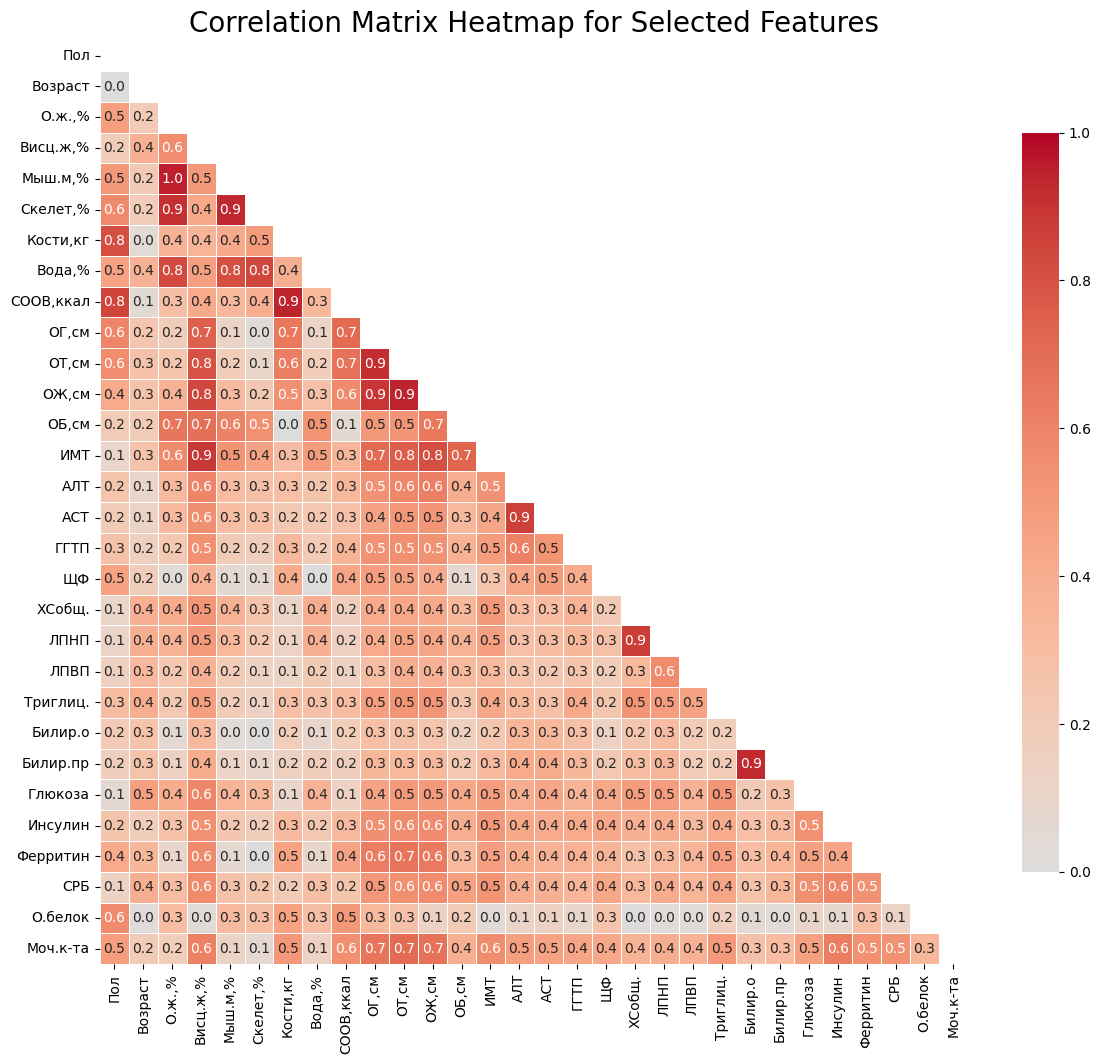

In [ ]:
correlation_matrix = X.corr().abs()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))  # Bigger figure size

# Draw the heatmap with the mask
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.1f',
                      linewidths=0.5, vmin=0, vmax=1, mask=mask,
                      cbar_kws={"shrink": .8})  # Add colorbar with smaller shrinkage

# Adjust font size
plt.title('Correlation Matrix Heatmap for Selected Features', size=20)  # Bigger title
plt.xticks(size=10)  # Smaller x-axis labels
plt.yticks(size=10)  # Smaller y-axis labels

# Display the plot
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Identify and drop highly correlated features
threshold = 0.9  # Higher threshold for high correlation
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
X_reduced = X.drop(columns=to_drop)

print(f"Removed features: {to_drop}")

Removed features: ['–°–∫–µ–ª–µ—Ç,%', '–°–û–û–í,–∫–∫–∞–ª', '–û–¢,—Å–º', '–û–ñ,—Å–º', '–ë–∏–ª–∏—Ä.–ø—Ä']


In [ ]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# –†–∞—Å—á–µ—Ç –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ VIF
vif_data = calculate_vif(X_reduced)

# –ü–µ—á–∞—Ç—å –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ VIF
print("Initial VIF values:")
print(vif_data)

# –£–¥–∞–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –≤—ã—Å–æ–∫–∏–º VIF –∏ –ø–µ—Ä–µ—Å—á–µ—Ç
while vif_data['VIF'].max() > 10:  # –ü–æ—Ä–æ–≥ VIF
    feature_to_drop = vif_data.sort_values('VIF', ascending=False)['Feature'].iloc[0]
    X_reduced = X_reduced.drop(columns=[feature_to_drop])
    vif_data = calculate_vif(X_reduced)

# –ü–µ—á–∞—Ç—å —Ñ–∏–Ω–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –∏—Ö VIF
print(f"\nFinal selected features after VIF correction: {X_reduced.columns.tolist()}")
print("\nFinal VIF values:")
print(vif_data)


Initial VIF values:
    Feature        VIF
0       –ü–æ–ª   2.617476
1       –ê–°–¢   7.663226
2      –ì–ì–¢–ü   7.489911
3      –õ–ü–ù–ü  14.701768
4      –õ–ü–í–ü   7.374776
5  –¢—Ä–∏–≥–ª–∏—Ü.   7.650004
6   –ë–∏–ª–∏—Ä.–æ   5.289948
7   –ò–Ω—Å—É–ª–∏–Ω  11.800610
8  –§–µ—Ä—Ä–∏—Ç–∏–Ω   4.683946
9       –°–†–ë   4.685125

Final selected features after VIF correction: ['–ü–æ–ª', '–ê–°–¢', '–ì–ì–¢–ü', '–õ–ü–í–ü', '–¢—Ä–∏–≥–ª–∏—Ü.', '–ë–∏–ª–∏—Ä.–æ', '–§–µ—Ä—Ä–∏—Ç–∏–Ω', '–°–†–ë']

Final VIF values:
    Feature       VIF
0       –ü–æ–ª  2.425377
1       –ê–°–¢  7.411016
2      –ì–ì–¢–ü  7.288521
3      –õ–ü–í–ü  6.402376
4  –¢—Ä–∏–≥–ª–∏—Ü.  6.095263
5   –ë–∏–ª–∏—Ä.–æ  4.850100
6  –§–µ—Ä—Ä–∏—Ç–∏–Ω  4.661206
7       –°–†–ë  3.949796


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, penalty='elasticnet', solver='saga', l1_ratio=0.5)

rfe = RFE(model, n_features_to_select=12)  # Increase number of features selected by RFE
fit = rfe.fit(X_train, y_train)

selected_features = X_reduced.columns[fit.support_]
print(f"Selected features: {selected_features}")

Selected features: Index(['–ü–æ–ª', '–ê–°–¢', '–ì–ì–¢–ü', '–õ–ü–í–ü', '–¢—Ä–∏–≥–ª–∏—Ü.', '–ë–∏–ª–∏—Ä.–æ', '–§–µ—Ä—Ä–∏—Ç–∏–Ω', '–°–†–ë'], dtype='object')


In [ ]:
model.fit(X_train[:, fit.support_], y_train)

coefficients = model.coef_[0]
intercept = model.intercept_[0]

coefficients_adjusted = coefficients / scaler.scale_[fit.support_]
intercept_adjusted = intercept - np.sum(coefficients * scaler.mean_[fit.support_] / scaler.scale_[fit.support_])

adjusted_coefs_series = pd.Series(coefficients_adjusted, index=selected_features)

regression_equation = f'Logit(P) = {intercept_adjusted:.4f}'
for feature, coef in adjusted_coefs_series.items():
    regression_equation += f' + ({coef:.4f} * {feature})'

print("Adjusted Coefficients:")
print(adjusted_coefs_series)
print("\nRegression Equation:")
print(regression_equation)

Adjusted Coefficients:
–ü–æ–ª         1.335932
–ê–°–¢         0.157455
–ì–ì–¢–ü        0.093585
–õ–ü–í–ü       -0.467491
–¢—Ä–∏–≥–ª–∏—Ü.    0.102368
–ë–∏–ª–∏—Ä.–æ    -0.049494
–§–µ—Ä—Ä–∏—Ç–∏–Ω    0.000000
–°–†–ë        -0.072655
dtype: float64

Regression Equation:
Logit(P) = -5.8928 + (1.3359 * –ü–æ–ª) + (0.1575 * –ê–°–¢) + (0.0936 * –ì–ì–¢–ü) + (-0.4675 * –õ–ü–í–ü) + (0.1024 * –¢—Ä–∏–≥–ª–∏—Ü.) + (-0.0495 * –ë–∏–ª–∏—Ä.–æ) + (0.0000 * –§–µ—Ä—Ä–∏—Ç–∏–Ω) + (-0.0727 * –°–†–ë)


In [ ]:
len(X_test)

36

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

scores = cross_val_score(model, X_scaled[:, fit.support_], y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

coefficients = model.coef_[0]
features = X_reduced.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})

importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)
print(importance_df)

Cross-validation scores: [0.91666667 0.77777778 0.88888889 0.86111111 0.80555556]
Mean cross-validation score: 0.85
Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.95      0.88      0.91        24

    accuracy                           0.89        36
   macro avg       0.87      0.90      0.88        36
weighted avg       0.90      0.89      0.89        36

    Feature  Coefficient  Absolute Coefficient
1       –ê–°–¢     2.603801              2.603801
2      –ì–ì–¢–ü     1.759536              1.759536
0       –ü–æ–ª     0.666480              0.666480
5   –ë–∏–ª–∏—Ä.–æ    -0.304254              0.304254
7       –°–†–ë    -0.180519              0.180519
3      –õ–ü–í–ü    -0.169520              0.169520
4  –¢—Ä–∏–≥–ª–∏—Ü.     0.085155              0.085155
6  –§–µ—Ä—Ä–∏—Ç–∏–Ω     0.000000              0.000000


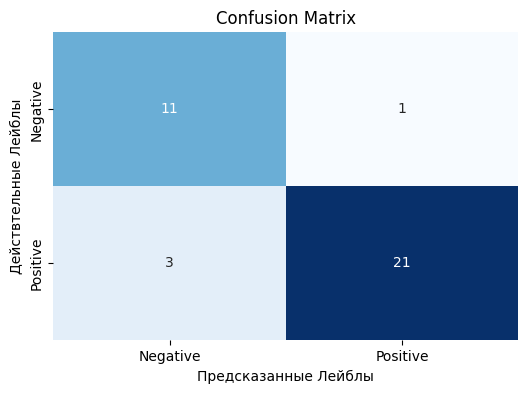

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –õ–µ–π–±–ª—ã')
plt.ylabel('–î–µ–π—Å—Ç–≤—Ç–µ–ª—å–Ω—ã–µ –õ–µ–π–±–ª—ã')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Assuming you have trained your model as shown in your previous code
coefficients = model.coef_[0]
features = X_reduced.columns

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})

# Sort by absolute coefficient values
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

print(importance_df)

    Feature  Coefficient  Absolute Coefficient
1       –ê–°–¢     2.603801              2.603801
2      –ì–ì–¢–ü     1.759536              1.759536
0       –ü–æ–ª     0.666480              0.666480
5   –ë–∏–ª–∏—Ä.–æ    -0.304254              0.304254
7       –°–†–ë    -0.180519              0.180519
3      –õ–ü–í–ü    -0.169520              0.169520
4  –¢—Ä–∏–≥–ª–∏—Ü.     0.085155              0.085155
6  –§–µ—Ä—Ä–∏—Ç–∏–Ω     0.000000              0.000000


## New Attempt - LOG REG with ELASTIC


**Coefficient Shrinking:**
The model assigns a weight (coefficient) to each feature. If a feature contributes a lot to predicting the target, its coefficient will be large. If it doesn‚Äôt contribute much, its coefficient will be small.

Penalties:

- L1 penalty (Lasso part): Adds a cost based on the size of the coefficients. If a feature‚Äôs coefficient is small, the L1 penalty may reduce it all the way to zero. A coefficient of zero means the feature is ignored or "eliminated" from the model because it‚Äôs considered unimportant.


- L2 penalty (Ridge part): Shrinks the coefficients of less important features but doesn‚Äôt set them to zero.

In [49]:
features = ['–ü–æ–ª', '–í–æ–∑—Ä–∞—Å—Ç', '–û.–∂.,%', '–í–∏—Å—Ü.–∂,%', '–ú—ã—à.–º,%', '–°–∫–µ–ª–µ—Ç,%',
            '–ö–æ—Å—Ç–∏,–∫–≥', '–í–æ–¥–∞,%', '–°–û–û–í,–∫–∫–∞–ª', '–û–ì,—Å–º', '–û–¢,—Å–º', '–û–ñ,—Å–º', '–û–ë,—Å–º',
            '–ò–ú–¢', '–ê–õ–¢', '–ê–°–¢', '–ì–ì–¢–ü', '–©–§', '–•–°–æ–±—â.', '–õ–ü–ù–ü', '–õ–ü–í–ü', '–¢—Ä–∏–≥–ª–∏—Ü.',
            '–ë–∏–ª–∏—Ä.–æ', '–ë–∏–ª–∏—Ä.–ø—Ä', '–ì–ª—é–∫–æ–∑–∞', '–ò–Ω—Å—É–ª–∏–Ω', '–§–µ—Ä—Ä–∏—Ç–∏–Ω', '–°–†–ë',
            '–û.–±–µ–ª–æ–∫', '–ú–æ—á.–∫-—Ç–∞']
target = 'Group'

X = combined_df[features]
y = combined_df[target]

In [ ]:
#values = ['–û.–∂.,%', '–í–∏—Å—Ü.–∂,%', '–ú—ã—à.–º,%', '–ò–ú–¢', '–ê–õ–¢', '–ê–°–¢', '–ì–ì–¢–ü', '–û.–±–µ–ª–æ–∫']

In [54]:
X = combined_df[features]
y = combined_df['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_elastic = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=10000)  # Elastic Net
log_reg_elastic.fit(X_train_scaled, y_train)

y_test_pred_class = log_reg_elastic.predict(X_test_scaled)
y_test_pred_proba = log_reg_elastic.predict_proba(X_test_scaled)[:, 1]

Elastic Net Logistic Regression Test Accuracy: 0.9167
Confusion Matrix on Test Data:
[[10  2]
 [ 1 23]]


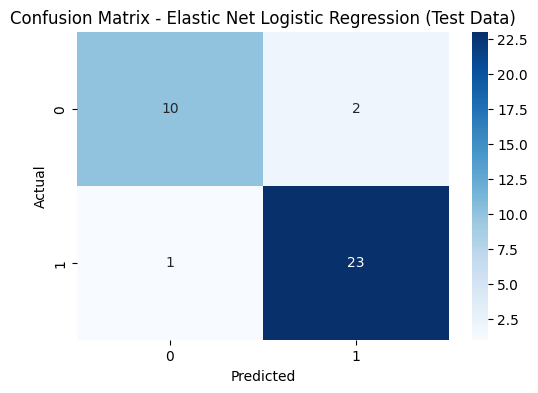


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.92      0.96      0.94        24

    accuracy                           0.92        36
   macro avg       0.91      0.90      0.90        36
weighted avg       0.92      0.92      0.92        36



In [55]:
cm_test = confusion_matrix(y_test, y_test_pred_class)
test_accuracy = accuracy_score(y_test, y_test_pred_class)

print(f"Elastic Net Logistic Regression Test Accuracy: {test_accuracy:.4f}")
print("Confusion Matrix on Test Data:")
print(cm_test)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Elastic Net Logistic Regression (Test Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred_class))

In [56]:

unscaled_coefficients = log_reg_elastic.coef_[0] / scaler.scale_

unscaled_intercept = log_reg_elastic.intercept_ - np.sum((scaler.mean_ / scaler.scale_) * log_reg_elastic.coef_[0])

unscaled_coefficients_series = pd.Series(unscaled_coefficients, index=X.columns)
print("Unscaled Coefficients:", unscaled_coefficients_series)
print("Unscaled Intercept:", unscaled_intercept)

def predict_with_unscaled(features):
    y_pred = unscaled_intercept.item()  # Ensure it's a scalar
    for feature, coef in zip(X.columns, unscaled_coefficients):
        y_pred += coef * features[feature]
    return y_pred

raw_predictions = combined_df.apply(predict_with_unscaled, axis=1)

predicted_probabilities = 1 / (1 + np.exp(-raw_predictions.to_numpy().flatten()))

predicted_classes = (predicted_probabilities >= 0.5).astype(int)

results_df = pd.DataFrame({
    'raw_prediction': raw_predictions,
    'predicted_probability': predicted_probabilities,
    'predicted_class': predicted_classes,
    'actual_class': combined_df['Group']
})

print(results_df.head())


cm = confusion_matrix(results_df['actual_class'], results_df['predicted_class'])
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(results_df['actual_class'], results_df['predicted_class'])
print(f"Accuracy: {accuracy:.4f}")

report = classification_report(results_df['actual_class'], results_df['predicted_class'])
print("Classification Report:")
print(report)

Unscaled Coefficients: –ü–æ–ª          0.000000
–í–æ–∑—Ä–∞—Å—Ç     -0.052589
–û.–∂.,%       0.043718
–í–∏—Å—Ü.–∂,%     0.342829
–ú—ã—à.–º,%     -0.113518
–°–∫–µ–ª–µ—Ç,%    -0.024138
–ö–æ—Å—Ç–∏,–∫–≥     0.000000
–í–æ–¥–∞,%      -0.008819
–°–û–û–í,–∫–∫–∞–ª   -0.000035
–û–ì,—Å–º       -0.079265
–û–¢,—Å–º        0.036202
–û–ñ,—Å–º        0.020505
–û–ë,—Å–º        0.000000
–ò–ú–¢          0.192689
–ê–õ–¢          0.102878
–ê–°–¢          0.067330
–ì–ì–¢–ü         0.080977
–©–§           0.020393
–•–°–æ–±—â.       0.417386
–õ–ü–ù–ü        -0.692138
–õ–ü–í–ü         0.000000
–¢—Ä–∏–≥–ª–∏—Ü.     0.000000
–ë–∏–ª–∏—Ä.–æ     -0.035024
–ë–∏–ª–∏—Ä.–ø—Ä     0.078859
–ì–ª—é–∫–æ–∑–∞      0.112528
–ò–Ω—Å—É–ª–∏–Ω      0.000000
–§–µ—Ä—Ä–∏—Ç–∏–Ω    -0.003887
–°–†–ë         -0.149854
–û.–±–µ–ª–æ–∫     -0.080332
–ú–æ—á.–∫-—Ç–∞     0.000011
dtype: float64
Unscaled Intercept: [0.09316277]
   raw_prediction  predicted_probability  predicted_class  actual_class
0        2.670866               0.935285          

### Best Hyperparameters

Fitting 5 folds for each of 25 candidates, totalling 125 fits


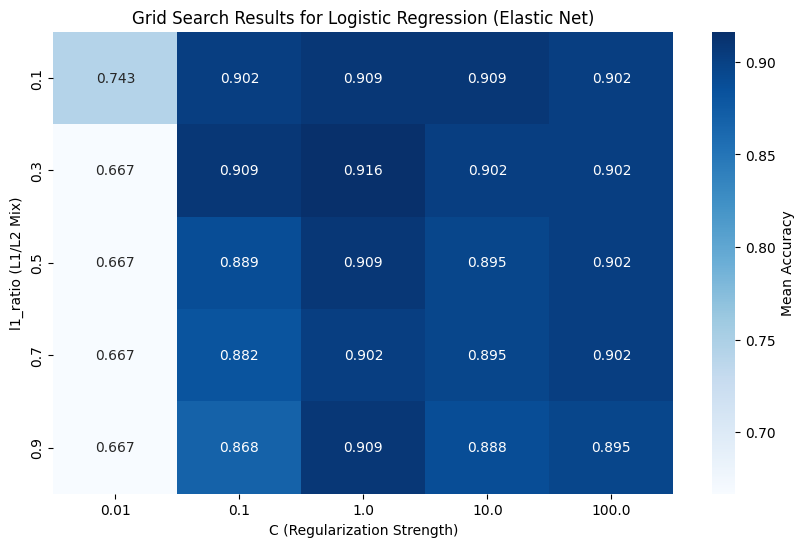

Best Parameters: {'C': 1, 'l1_ratio': 0.3}
Best Cross-Validation Score: 0.9163


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Step 1: Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],  # L1-L2 mix ratio
}

# Step 2: Initialize the Logistic Regression with Elastic Net
log_reg_elastic = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000)

# Step 3: Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=log_reg_elastic, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Step 4: Fit the GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Step 5: Extract the cross-validation results
results = grid_search.cv_results_

# Step 6: Convert results to a DataFrame for easier plotting
import pandas as pd
cv_results_df = pd.DataFrame(results)

# Step 7: Create a pivot table to organize mean test scores by l1_ratio and C
pivot_table = cv_results_df.pivot(index='param_l1_ratio', columns='param_C', values='mean_test_score')

# Step 8: Plot the heatmap of the pivot table
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="Blues", cbar_kws={'label': 'Mean Accuracy'})
plt.title("Grid Search Results for Logistic Regression (Elastic Net)")
plt.xlabel("C (Regularization Strength)")
plt.ylabel("l1_ratio (L1/L2 Mix)")
plt.show()

# Step 9: Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")


Final Test Accuracy: 0.9444
Final Confusion Matrix:
[[10  2]
 [ 0 24]]


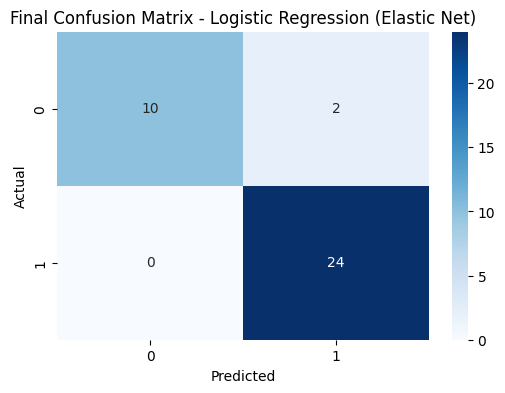

In [ ]:
# Train the final model using the best parameters
final_log_reg_elastic = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.7, C=1, max_iter=10000)
final_log_reg_elastic.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_test_pred_final = final_log_reg_elastic.predict(X_test_scaled)

# Evaluate the final model on the test set
final_test_accuracy = accuracy_score(y_test, y_test_pred_final)
final_cm = confusion_matrix(y_test, y_test_pred_final)

print(f"Final Test Accuracy: {final_test_accuracy:.4f}")
print("Final Confusion Matrix:")
print(final_cm)

# Optionally plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(final_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Final Confusion Matrix - Logistic Regression (Elastic Net)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [57]:
final_log_reg_elastic = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.7, C=1, max_iter=10000)
final_log_reg_elastic.fit(X_train_scaled, y_train)

scaled_coefficients = final_log_reg_elastic.coef_[0]
scaled_intercept = final_log_reg_elastic.intercept_[0]

unscaled_coefficients = scaled_coefficients / scaler.scale_
unscaled_intercept = scaled_intercept - np.sum((scaler.mean_ / scaler.scale_) * scaled_coefficients)

unscaled_coefficients_series = pd.Series(unscaled_coefficients, index=X.columns)
print("Unscaled Coefficients:", unscaled_coefficients_series)
print("Unscaled Intercept:", unscaled_intercept)

Unscaled Coefficients: –ü–æ–ª          0.000000
–í–æ–∑—Ä–∞—Å—Ç     -0.050985
–û.–∂.,%       0.040147
–í–∏—Å—Ü.–∂,%     0.376490
–ú—ã—à.–º,%     -0.132765
–°–∫–µ–ª–µ—Ç,%     0.000000
–ö–æ—Å—Ç–∏,–∫–≥     0.000000
–í–æ–¥–∞,%      -0.001737
–°–û–û–í,–∫–∫–∞–ª    0.000000
–û–ì,—Å–º       -0.068703
–û–¢,—Å–º        0.023786
–û–ñ,—Å–º        0.011485
–û–ë,—Å–º        0.000000
–ò–ú–¢          0.203377
–ê–õ–¢          0.110681
–ê–°–¢          0.064737
–ì–ì–¢–ü         0.082478
–©–§           0.019884
–•–°–æ–±—â.       0.335962
–õ–ü–ù–ü        -0.633658
–õ–ü–í–ü         0.000000
–¢—Ä–∏–≥–ª–∏—Ü.     0.000000
–ë–∏–ª–∏—Ä.–æ     -0.013027
–ë–∏–ª–∏—Ä.–ø—Ä     0.000000
–ì–ª—é–∫–æ–∑–∞      0.053802
–ò–Ω—Å—É–ª–∏–Ω      0.000000
–§–µ—Ä—Ä–∏—Ç–∏–Ω    -0.003972
–°–†–ë         -0.136714
–û.–±–µ–ª–æ–∫     -0.081790
–ú–æ—á.–∫-—Ç–∞     0.000000
dtype: float64
Unscaled Intercept: 0.9558742218995437


In [59]:
def predict_with_unscaled_data(row):
    y_pred = unscaled_intercept
    for feature, coef in zip(X.columns, unscaled_coefficients):
        y_pred += coef * row[feature]
    return y_pred

predictions = combined_df.apply(predict_with_unscaled_data, axis=1)

predicted_probabilities = 1 / (1 + np.exp(-predictions))

predicted_classes = (predicted_probabilities >= 0.5).astype(int)

results_df = pd.DataFrame({
    'raw_prediction': predictions,
    'predicted_probability': predicted_probabilities,
    'predicted_class': predicted_classes,
    'actual_class': combined_df['Group']  # Assuming 'Group' is the actual label column
})

print(results_df.head())

   raw_prediction  predicted_probability  predicted_class  actual_class
0        2.639228               0.933344                1             1
1        1.529693               0.821961                1             1
2        8.146239               0.999710                1             1
3        5.142092               0.994189                1             1
4       13.015088               0.999998                1             1


In [ ]:

cm = confusion_matrix(results_df['actual_class'], results_df['predicted_class'])
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(results_df['actual_class'], results_df['predicted_class'])
print(f"Accuracy: {accuracy:.4f}")

report = classification_report(results_df['actual_class'], results_df['predicted_class'])
print("Classification Report:")
print(report)

## Web App

In [60]:
!pip install streamlit ngrok

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41.9/41.9 kB 2.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.7/8.7 MB 52.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.1/3.1 MB 35.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.9/6.9 MB 43.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 79.3/79.3 kB 6.3 MB/s eta 0:00:00


### Code - function

In [31]:
# Saving the improved Streamlit app code with gender-based logic for normal ranges and blue design
with open('health_prediction_app.py', 'w') as f:
    f.write("""
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt

# Define the unscaled coefficients and intercept
unscaled_coefficients = {
    '–û.–∂.,%': 0.011731,
    '–í–∏—Å—Ü.–∂,%': 0.256571,
    '–ú—ã—à.–º,%': -0.118061,
    '–ò–ú–¢': 0.175329,
    '–ê–õ–¢': 0.109809,
    '–ê–°–¢': 0.060320,
    '–ì–ì–¢–ü': 0.063493,
    '–û.–±–µ–ª–æ–∫': -0.118442
}

unscaled_intercept = 1.01741283

# Function to predict probability and class based on input features
def predict_probability_and_class(features, threshold=0.5):
    y_pred = unscaled_intercept
    for feature, coef in unscaled_coefficients.items():
        y_pred += coef * features.get(feature, 0)
    probability = 1 / (1 + np.exp(-y_pred))
    predicted_class = "–ë–æ–ª–µ–Ω" if probability >= threshold else "–ó–¥–æ—Ä–æ–≤"
    return probability, predicted_class

# Streamlit App Interface
st.set_page_config(page_title="–ü—Ä–æ–≥–Ω–æ–∑ –ù–ê–ñ–ë–ü", page_icon="üíâ", layout="wide")

# App Title and Description
st.title("üíâ –ü—Ä–æ–≥–Ω–æ–∑ –ù–ê–ñ–ë–ü")
st.write("–í–≤–µ–¥–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –ø—Ä–æ–≥–Ω–æ–∑–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ù–ê–ñ–ë–ü.")

# Gender selection
gender = st.radio("**–í—ã–±–µ—Ä–∏—Ç–µ –ø–æ–ª:**", ("–ú—É–∂—Å–∫–æ–π", "–ñ–µ–Ω—Å–∫–∏–π"))

# Adjust normal ranges based on gender
if gender == "–ú—É–∂—Å–∫–æ–π":
    normal_ranges = {
        '–û–∂–∏—Ä–µ–Ω–∏–µ, %': (10, 20),
        '–í–∏—Å—Ü–µ—Ä–∞–ª—å–Ω—ã–π –∂–∏—Ä, %': (5, 15),
        '–ú—ã—à–µ—á–Ω–∞—è –º–∞—Å—Å–∞, %': (40, 50),
        '–ò–ú–¢': (18.5, 24.9),
        '–ê–õ–¢ (–µ–¥/–ª)': (7, 56),
        '–ê–°–¢ (–µ–¥/–ª)': (8, 48),
        '–ì–ì–¢–ü (–µ–¥/–ª)': (9, 48),
        '–û–±—â–∏–π –±–µ–ª–æ–∫ (–≥/–ª)': (6.0, 8.3)
    }
else:
    normal_ranges = {
        '–û–∂–∏—Ä–µ–Ω–∏–µ, %': (18, 28),
        '–í–∏—Å—Ü–µ—Ä–∞–ª—å–Ω—ã–π –∂–∏—Ä, %': (5, 15),
        '–ú—ã—à–µ—á–Ω–∞—è –º–∞—Å—Å–∞, %': (30, 40),
        '–ò–ú–¢': (18.5, 24.9),
        '–ê–õ–¢ (–µ–¥/–ª)': (7, 56),
        '–ê–°–¢ (–µ–¥/–ª)': (8, 48),
        '–ì–ì–¢–ü (–µ–¥/–ª)': (9, 48),
        '–û–±—â–∏–π –±–µ–ª–æ–∫ (–≥/–ª)': (6.0, 8.3)
    }

# Layout for input and results
col1, col2 = st.columns(2)

with col1:
    st.header("**–í–≤–µ–¥–∏—Ç–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏:**")
    –û_–∂ = st.number_input("**–û–∂–∏—Ä–µ–Ω–∏–µ, %**", min_value=0.0, max_value=100.0, value=25.0)
    –í–∏—Å—Ü_–∂ = st.number_input("**–í–∏—Å—Ü–µ—Ä–∞–ª—å–Ω—ã–π –∂–∏—Ä, %**", min_value=0.0, max_value=100.0, value=15.0)
    –ú—ã—à_–º = st.number_input("**–ú—ã—à–µ—á–Ω–∞—è –º–∞—Å—Å–∞, %**", min_value=0.0, max_value=100.0, value=45.0)
    –ò–ú–¢ = st.number_input("**–ò–Ω–¥–µ–∫—Å –º–∞—Å—Å—ã —Ç–µ–ª–∞ (–ò–ú–¢)**", min_value=0.0, max_value=100.0, value=24.0)
    –ê–õ–¢ = st.number_input("**–ê–õ–¢ (–µ–¥/–ª)**", min_value=0.0, max_value=200.0, value=30.0)
    –ê–°–¢ = st.number_input("**–ê–°–¢ (–µ–¥/–ª)**", min_value=0.0, max_value=200.0, value=20.0)
    –ì–ì–¢–ü = st.number_input("**–ì–ì–¢–ü (–µ–¥/–ª)**", min_value=0.0, max_value=200.0, value=55.0)
    –û_–±–µ–ª–æ–∫ = st.number_input("**–û–±—â–∏–π –±–µ–ª–æ–∫ (–≥/–ª)**", min_value=0.0, max_value=20.0, value=6.0)

with col2:
    if st.button("–†–∞—Å—Å—á–∏—Ç–∞—Ç—å –ü—Ä–æ–≥–Ω–æ–∑"):
        # Input features
        input_features = {
            '–û.–∂.,%': –û_–∂,
            '–í–∏—Å—Ü.–∂,%': –í–∏—Å—Ü_–∂,
            '–ú—ã—à.–º,%': –ú—ã—à_–º,
            '–ò–ú–¢': –ò–ú–¢,
            '–ê–õ–¢': –ê–õ–¢,
            '–ê–°–¢': –ê–°–¢,
            '–ì–ì–¢–ü': –ì–ì–¢–ü,
            '–û.–±–µ–ª–æ–∫': –û_–±–µ–ª–æ–∫
        }
        probability, predicted_class = predict_probability_and_class(input_features)

        # Display the results with visuals
        st.subheader("**–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ü—Ä–æ–≥–Ω–æ–∑–∞:**")
        st.write(f"**–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å:** {probability:.4f}")
        st.write(f"**–ö–ª–∞—Å—Å:** {predicted_class}")

        if predicted_class == "–ë–æ–ª–µ–Ω":
            st.error("–ú–æ–¥–µ–ª—å –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –≤—ã –±–æ–ª—å–Ω—ã.")
        else:
            st.success("–ú–æ–¥–µ–ª—å –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –≤—ã –∑–¥–æ—Ä–æ–≤—ã.")

        # Visual comparison of inputs vs normal ranges
        st.subheader("**–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –≤–≤–µ–¥–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Å –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º–∏ –¥–∏–∞–ø–∞–∑–æ–Ω–∞–º–∏**")
        fig, ax = plt.subplots(figsize=(8, 5))
        features = ['–û–∂–∏—Ä–µ–Ω–∏–µ, %', '–í–∏—Å—Ü–µ—Ä–∞–ª—å–Ω—ã–π –∂–∏—Ä, %', '–ú—ã—à–µ—á–Ω–∞—è –º–∞—Å—Å–∞, %', '–ò–ú–¢', '–ê–õ–¢ (–µ–¥/–ª)', '–ê–°–¢ (–µ–¥/–ª)', '–ì–ì–¢–ü (–µ–¥/–ª)', '–û–±—â–∏–π –±–µ–ª–æ–∫ (–≥/–ª)']
        user_values = [–û_–∂, –í–∏—Å—Ü_–∂, –ú—ã—à_–º, –ò–ú–¢, –ê–õ–¢, –ê–°–¢, –ì–ì–¢–ü, –û_–±–µ–ª–æ–∫]
        normal_min = [normal_ranges[feat][0] for feat in features]
        normal_max = [normal_ranges[feat][1] for feat in features]

        # Ensure x and y are the same size by plotting for every feature
        # Plot normal ranges as horizontal lines
        for i, (min_val, max_val) in enumerate(zip(normal_min, normal_max)):
            ax.plot([min_val, max_val], [i, i], color='gray', lw=6, alpha=0.5, label='–ù–æ—Ä–º–∞–ª—å–Ω—ã–π –¥–∏–∞–ø–∞–∑–æ–Ω' if i == 0 else "")

        # Plot user values as blue markers on top of the normal ranges
        ax.scatter(user_values, range(len(features)), color='blue', s=100, zorder=5, label='–í–∞—à–∏ –∑–Ω–∞—á–µ–Ω–∏—è')

        # Design improvements
        ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏—è', fontsize=12, fontweight='bold')
        ax.set_title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π —Å –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º–∏ –¥–∏–∞–ø–∞–∑–æ–Ω–∞–º–∏', fontsize=14, fontweight='bold')

        # Customize ticks and labels
        ax.set_yticks(range(len(features)))
        ax.set_yticklabels(features, fontsize=11, fontweight='bold')
        ax.tick_params(axis='x', labelsize=10)
        ax.xaxis.label.set_size(12)

        # Remove right and top spines (axes)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        # Bold the axes
        ax.spines['left'].set_linewidth(1.5)
        ax.spines['bottom'].set_linewidth(1.5)

        # Set grid for better readability
        ax.grid(True, axis='x', linestyle='--', alpha=0.6)

        # Add a legend with better positioning
        ax.legend(loc='lower right', fontsize=10)

        # Display the plot
        st.pyplot(fig)

# Footer
st.write("---")
st.write("–≠—Ç–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ —Å–æ–∑–¥–∞–Ω–æ –¥–ª—è –ø–æ–º–æ—â–∏ –≤ –ø—Ä–æ–≥–Ω–æ–∑–µ –ù–ê–ñ–ë–ü –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π.")
st.write("–ü—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –±–∏–æ—Ö–∏–º–∏—á–µ—Å–∫–∏–µ –º–∞—Ä–∫–µ—Ä—ã, –∏–Ω–¥–µ–∫—Å –º–∞—Å—Å—ã —Ç–µ–ª–∞, –∏ –¥—Ä—É–≥–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã.")
st.write("–ü—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –ù–ï —Å–æ–∑–¥–∞–Ω–æ –¥–ª—è —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ–π –ø–æ—Å—Ç–∞–Ω–æ–≤–∫–∏ –¥–∏–∞–≥–Ω–æ–∑–∞.")
    """)

In [27]:
!pip install pyngrok

In [75]:
!ps -ef | grep streamlit

root       29712       1  0 10:38 ?        00:00:03 /usr/bin/python3 /usr/local/bin/streamlit run he
root       32809    1767  0 10:51 ?        00:00:00 /bin/bash -c ps -ef | grep streamlit
root       32811   32809  0 10:51 ?        00:00:00 grep streamlit


In [ ]:
#!killall -9 python3

In [28]:
!streamlit run health_prediction_app.py --server.port 8501 &>/dev/null&

In [29]:
from pyngrok import ngrok

ngrok.set_auth_token('2kBZ0My2aTS2A5YxsNl0Ak31Foz_6Cw12VVU49uDn7GSGZDdZ')

public_url = ngrok.connect(8501)
print(f"Public URL: {public_url}")

Public URL: NgrokTunnel: "https://6e2b-34-32-245-103.ngrok-free.app" -> "http://localhost:8501"


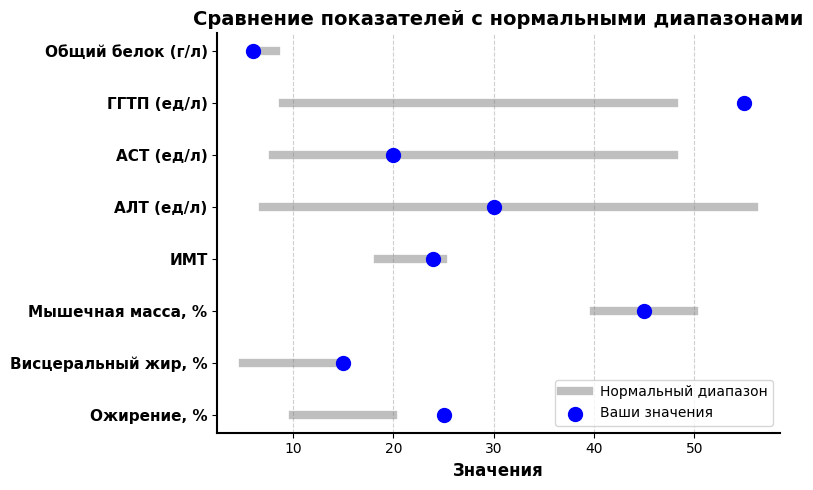

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate user input values
user_values = [25.0, 15.0, 45.0, 24.0, 30.0, 20.0, 55.0, 6.0]  # These are the values entered by the user

# Simulate gender and normal ranges
gender = "–ú—É–∂—Å–∫–æ–π"  # Change to "–ñ–µ–Ω—Å–∫–∏–π" to test female ranges

# Adjust normal ranges based on gender
if gender == "–ú—É–∂—Å–∫–æ–π":
    normal_ranges = {
        '–û–∂–∏—Ä–µ–Ω–∏–µ, %': (10, 20),
        '–í–∏—Å—Ü–µ—Ä–∞–ª—å–Ω—ã–π –∂–∏—Ä, %': (5, 15),
        '–ú—ã—à–µ—á–Ω–∞—è –º–∞—Å—Å–∞, %': (40, 50),
        '–ò–ú–¢': (18.5, 24.9),
        '–ê–õ–¢ (–µ–¥/–ª)': (7, 56),
        '–ê–°–¢ (–µ–¥/–ª)': (8, 48),
        '–ì–ì–¢–ü (–µ–¥/–ª)': (9, 48),
        '–û–±—â–∏–π –±–µ–ª–æ–∫ (–≥/–ª)': (6.0, 8.3)
    }
else:
    normal_ranges = {
        '–û–∂–∏—Ä–µ–Ω–∏–µ, %': (18, 28),
        '–í–∏—Å—Ü–µ—Ä–∞–ª—å–Ω—ã–π –∂–∏—Ä, %': (5, 15),
        '–ú—ã—à–µ—á–Ω–∞—è –º–∞—Å—Å–∞, %': (30, 40),
        '–ò–ú–¢': (18.5, 24.9),
        '–ê–õ–¢ (–µ–¥/–ª)': (7, 56),
        '–ê–°–¢ (–µ–¥/–ª)': (8, 48),
        '–ì–ì–¢–ü (–µ–¥/–ª)': (9, 48),
        '–û–±—â–∏–π –±–µ–ª–æ–∫ (–≥/–ª)': (6.0, 8.3)
    }

# Plot comparison between user values and normal ranges
features = ['–û–∂–∏—Ä–µ–Ω–∏–µ, %', '–í–∏—Å—Ü–µ—Ä–∞–ª—å–Ω—ã–π –∂–∏—Ä, %', '–ú—ã—à–µ—á–Ω–∞—è –º–∞—Å—Å–∞, %', '–ò–ú–¢', '–ê–õ–¢ (–µ–¥/–ª)', '–ê–°–¢ (–µ–¥/–ª)', '–ì–ì–¢–ü (–µ–¥/–ª)', '–û–±—â–∏–π –±–µ–ª–æ–∫ (–≥/–ª)']
normal_min = [normal_ranges[feat][0] for feat in features]
normal_max = [normal_ranges[feat][1] for feat in features]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot normal ranges as horizontal lines (with error bars)
for i, (min_val, max_val) in enumerate(zip(normal_min, normal_max)):
    ax.plot([min_val, max_val], [i, i], color='gray', lw=6, alpha=0.5, label='–ù–æ—Ä–º–∞–ª—å–Ω—ã–π –¥–∏–∞–ø–∞–∑–æ–Ω' if i == 0 else "")

# Plot user values as markers on top of the normal ranges
ax.scatter(user_values, range(len(features)), color='blue', s=100, zorder=5, label='–í–∞—à–∏ –∑–Ω–∞—á–µ–Ω–∏—è')

# Design improvements
ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏—è', fontsize=12, fontweight='bold')
ax.set_title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π —Å –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º–∏ –¥–∏–∞–ø–∞–∑–æ–Ω–∞–º–∏', fontsize=14, fontweight='bold')

# Customize ticks and labels
ax.set_yticks(range(len(features)))
ax.set_yticklabels(features, fontsize=11, fontweight='bold')
ax.tick_params(axis='x', labelsize=10)
ax.xaxis.label.set_size(12)

# Remove right and top spines (axes)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Bold the axes
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Set grid for better readability
ax.grid(True, axis='x', linestyle='--', alpha=0.6)

# Add a legend with better positioning
ax.legend(loc='lower right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

### Other - FLASK

In [ ]:
from pyngrok import ngrok

# Replace 'your_auth_token' with the token you copied from Ngrok's dashboard
ngrok.set_auth_token('2kBZ0My2aTS2A5YxsNl0Ak31Foz_6Cw12VVU49uDn7GSGZDdZ')

# Create a tunnel to the Flask app
public_url = ngrok.connect(5000)
print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:5000\"")

 * ngrok tunnel "NgrokTunnel: "https://eb45-35-227-140-28.ngrok-free.app" -> "http://localhost:5000"" -> "http://127.0.0.1:5000"


In [ ]:
from flask import Flask, render_template_string, request, jsonify
import numpy as np

# Initialize Flask app
app = Flask(__name__)

# Define the model parameters based on the given equation
intercept_adjusted = -5.8922
coefficients_adjusted = {
    '–ü–æ–ª': 1.3358,
    '–ê–°–¢': 0.1574,
    '–ì–ì–¢–ü': 0.0936,
    '–õ–ü–í–ü': -0.4675,
    '–¢—Ä–∏–≥–ª–∏—Ü.': 0.1024,
    '–ë–∏–ª–∏—Ä.–æ': -0.0495,
    '–°–†–ë': -0.0726
}

selected_features = list(coefficients_adjusted.keys())

# Define HTML template
html_template = '''
<!DOCTYPE html>
<html lang="ru">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>–ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –ù–ê–ñ–ë–ü</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 0;
        }
        .container {
            width: 80%;
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
            background: #fff;
            box-shadow: 0 0 10px rgba(0,0,0,0.1);
            border-radius: 8px;
        }
        h1 {
            text-align: center;
            color: #007BFF;
        }
        label {
            display: block;
            margin: 10px 0 5px;
        }
        input[type="text"] {
            width: calc(100% - 22px);
            padding: 10px;
            margin-bottom: 20px;
            border: 1px solid #ddd;
            border-radius: 4px;
        }
        input[type="submit"] {
            background-color: #007BFF;
            color: #fff;
            border: none;
            padding: 10px 20px;
            border-radius: 4px;
            cursor: pointer;
            font-size: 16px;
        }
        input[type="submit"]:hover {
            background-color: #0056b3;
        }
        #result {
            margin-top: 20px;
            padding: 15px;
            background: #e9ecef;
            border: 1px solid #ddd;
            border-radius: 4px;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>–ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –ù–ê–ñ–ë–ü - –ê–Ω–∫–µ—Ç–∞</h1>
        <form action="/predict" method="post">
            <label for="–ü–æ–ª">–ü–æ–ª (–∂/–º):</label>
            <select id="–ü–æ–ª" name="–ü–æ–ª" required>
                <option value="1">–∂</option>
                <option value="0">–º</option>
            </select><br>
            <label for="–ê–°–¢">–ê—Å–ø–∞—Ä—Ç–∞—Ç–∞–º–∏–Ω–æ—Ç—Ä–∞–Ω—Å—Ñ–µ—Ä–∞–∑–∞ (–ê–°–¢):</label>
            <input type="text" id="–ê–°–¢" name="–ê–°–¢" required><br>
            <label for="–ì–ì–¢–ü">–ì–∞–º–º–∞-–≥–ª—É—Ç–∞–º–∏–ª—Ç—Ä–∞–Ω—Å—Ñ–µ—Ä–∞–∑–∞ (–ì–ì–¢–ü):</label>
            <input type="text" id="–ì–ì–¢–ü" name="–ì–ì–¢–ü" required><br>
            <label for="–õ–ü–í–ü">–õ–∏–ø–æ–ø—Ä–æ—Ç–µ–∏–Ω—ã –≤—ã—Å–æ–∫–æ–π –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ (–õ–ü–í–ü):</label>
            <input type="text" id="–õ–ü–í–ü" name="–õ–ü–í–ü" required><br>
            <label for="–¢—Ä–∏–≥–ª–∏—Ü.">–¢—Ä–∏–≥–ª–∏—Ü–µ—Ä–∏–¥—ã (–¢—Ä–∏–≥–ª–∏—Ü.):</label>
            <input type="text" id="–¢—Ä–∏–≥–ª–∏—Ü." name="–¢—Ä–∏–≥–ª–∏—Ü." required><br>
            <label for="–ë–∏–ª–∏—Ä.–æ">–ë–∏–ª–∏—Ä—É–±–∏–Ω –æ–±—â–∏–π (–ë–∏–ª–∏—Ä.–æ):</label>
            <input type="text" id="–ë–∏–ª–∏—Ä.–æ" name="–ë–∏–ª–∏—Ä.–æ" required><br>
            <label for="–°–†–ë">–°-—Ä–µ–∞–∫—Ç–∏–≤–Ω—ã–π –±–µ–ª–æ–∫ (–°–†–ë):</label>
            <input type="text" id="–°–†–ë" name="–°–†–ë" required><br>
            <input type="submit" value="–û—Ç–ø—Ä–∞–≤–∏—Ç—å">
        </form>
        <div id="result"></div>
    </div>
    <script>
        const form = document.querySelector('form');
        form.addEventListener('submit', async (e) => {
            e.preventDefault();
            const formData = new FormData(form);
            const response = await fetch('/predict', {
                method: 'POST',
                body: formData
            });
            const result = await response.json();
            const resultDiv = document.getElementById('result');
            if (result.error) {
                resultDiv.innerHTML = `<p>Error: ${result.error}</p>`;
            } else {
                resultDiv.innerHTML = `<p>–ü—Ä–æ–≥–Ω–æ–∑: ${result.prediction}</p><p>–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å: ${result.probability.toFixed(4)}</p>`;
            }
        });
    </script>
</body>
</html>
'''

@app.route('/')
def home():
    return render_template_string(html_template, features=selected_features)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Retrieve form data
        data = [float(request.form[feature]) for feature in selected_features]

        # Convert gender to numeric value
        gender = float(request.form['–ü–æ–ª'])

        # Calculate prediction using logistic regression equation
        prediction = intercept_adjusted
        for feature, coef in coefficients_adjusted.items():
            if feature == '–ü–æ–ª':
                prediction += coef * gender
            else:
                prediction += coef * data[selected_features.index(feature)]

        # Apply sigmoid function
        p_value = 1 / (1 + np.exp(-prediction))

        # Convert prediction to readable format
        result = '–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ' if p_value > 0.5 else '–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ'

        return jsonify({'–ü—Ä–æ–≥–Ω–æ–∑': result, '–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å': p_value})

    except Exception as e:
        return jsonify({'error': str(e)})

# Create a tunnel to the Flask app
public_url = ngrok.connect(5000)
print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:5000\"")

if __name__ == '__main__':
    app.run()

 * ngrok tunnel "NgrokTunnel: "https://e716-35-227-140-28.ngrok-free.app" -> "http://localhost:5000"" -> "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [04/Aug/2024 11:15:28] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Aug/2024 11:15:28] "GET /favicon.ico HTTP/1.1" 404 -


#### Offline App

In [ ]:
import tkinter as tk
from tkinter import messagebox
import numpy as np

# Define the model parameters based on the given equation
intercept_adjusted = -5.8922
coefficients_adjusted = {
    '–ü–æ–ª': 1.3358,
    '–ê–°–¢': 0.1574,
    '–ì–ì–¢–ü': 0.0936,
    '–õ–ü–í–ü': -0.4675,
    '–¢—Ä–∏–≥–ª–∏—Ü.': 0.1024,
    '–ë–∏–ª–∏—Ä.–æ': -0.0495,
    '–°–†–ë': -0.0726
}

# Define the prediction function
def calculate_nlfd_prediction(gender, ast, ggtp, lpvp, trigl, bilirr, crb):
    prediction = intercept_adjusted
    prediction += coefficients_adjusted['–ü–æ–ª'] * gender
    prediction += coefficients_adjusted['–ê–°–¢'] * ast
    prediction += coefficients_adjusted['–ì–ì–¢–ü'] * ggtp
    prediction += coefficients_adjusted['–õ–ü–í–ü'] * lpvp
    prediction += coefficients_adjusted['–¢—Ä–∏–≥–ª–∏—Ü.'] * trigl
    prediction += coefficients_adjusted['–ë–∏–ª–∏—Ä.–æ'] * bilirr
    prediction += coefficients_adjusted['–°–†–ë'] * crb

    # Apply sigmoid function
    p_value = 1 / (1 + np.exp(-prediction))
    return p_value

def on_submit():
    try:
        gender = int(gender_var.get())
        ast = float(ast_var.get())
        ggtp = float(ggtp_var.get())
        lpvp = float(lpvp_var.get())
        trigl = float(trigl_var.get())
        bilirr = float(bilirr_var.get())
        crb = float(crb_var.get())

        p_value = calculate_nlfd_prediction(gender, ast, ggtp, lpvp, trigl, bilirr, crb)
        result = '–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ' if p_value > 0.5 else '–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ'

        messagebox.showinfo("–†–µ–∑—É–ª—å—Ç–∞—Ç", f"–ü—Ä–æ–≥–Ω–æ–∑: {result}\n–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å: {p_value:.4f}")
    except ValueError:
        messagebox.showerror("–û—à–∏–±–∫–∞", "–ü–æ–∂–∞–ª—É–π—Å—Ç–∞, –≤–≤–µ–¥–∏—Ç–µ –ø—Ä–∞–≤–∏–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.")

# Create the main window
root = tk.Tk()
root.title("–ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –ù–ê–ñ–ë–ü")

# Create and place labels and entries
tk.Label(root, text="–ü–æ–ª (–∂/–º):").grid(row=0, column=0, padx=10, pady=5, sticky="e")
gender_var = tk.StringVar(value="1")
tk.Radiobutton(root, text="–∂", variable=gender_var, value="1").grid(row=0, column=1, padx=10, pady=5)
tk.Radiobutton(root, text="–º", variable=gender_var, value="0").grid(row=0, column=2, padx=10, pady=5)

tk.Label(root, text="–ê—Å–ø–∞—Ä—Ç–∞—Ç–∞–º–∏–Ω–æ—Ç—Ä–∞–Ω—Å—Ñ–µ—Ä–∞–∑–∞ (–ê–°–¢):").grid(row=1, column=0, padx=10, pady=5, sticky="e")
ast_var = tk.StringVar()
tk.Entry(root, textvariable=ast_var).grid(row=1, column=1, columnspan=2, padx=10, pady=5)

tk.Label(root, text="–ì–∞–º–º–∞-–≥–ª—É—Ç–∞–º–∏–ª—Ç—Ä–∞–Ω—Å—Ñ–µ—Ä–∞–∑–∞ (–ì–ì–¢–ü):").grid(row=2, column=0, padx=10, pady=5, sticky="e")
ggtp_var = tk.StringVar()
tk.Entry(root, textvariable=ggtp_var).grid(row=2, column=1, columnspan=2, padx=10, pady=5)

tk.Label(root, text="–õ–∏–ø–æ–ø—Ä–æ—Ç–µ–∏–Ω—ã –≤—ã—Å–æ–∫–æ–π –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ (–õ–ü–í–ü):").grid(row=3, column=0, padx=10, pady=5, sticky="e")
lpvp_var = tk.StringVar()
tk.Entry(root, textvariable=lpvp_var).grid(row=3, column=1, columnspan=2, padx=10, pady=5)

tk.Label(root, text="–¢—Ä–∏–≥–ª–∏—Ü–µ—Ä–∏–¥—ã (–¢—Ä–∏–≥–ª–∏—Ü.):").grid(row=4, column=0, padx=10, pady=5, sticky="e")
trigl_var = tk.StringVar()
tk.Entry(root, textvariable=trigl_var).grid(row=4, column=1, columnspan=2, padx=10, pady=5)

tk.Label(root, text="–ë–∏–ª–∏—Ä—É–±–∏–Ω –æ–±—â–∏–π (–ë–∏–ª–∏—Ä.–æ):").grid(row=5, column=0, padx=10, pady=5, sticky="e")
bilirr_var = tk.StringVar()
tk.Entry(root, textvariable=bilirr_var).grid(row=5, column=1, columnspan=2, padx=10, pady=5)

tk.Label(root, text="–°-—Ä–µ–∞–∫—Ç–∏–≤–Ω—ã–π –±–µ–ª–æ–∫ (–°–†–ë):").grid(row=6, column=0, padx=10, pady=5, sticky="e")
crb_var = tk.StringVar()
tk.Entry(root, textvariable=crb_var).grid(row=6, column=1, columnspan=2, padx=10, pady=5)

tk.Button(root, text="–û—Ç–ø—Ä–∞–≤–∏—Ç—å", command=on_submit).grid(row=7, column=0, columnspan=3, padx=10, pady=20)

# Start the Tkinter event loop
root.mainloop()

In [ ]:
def calculate_nlfd_prediction(gender, ast, ggtp, lpvp, trigl, insulin, ferrit, crb):
    intercept = intercept_adjusted

    coefficients = {
        '–ü–æ–ª': coefficients_adjusted[0],
        '–ê–°–¢': coefficients_adjusted[1],
        '–ì–ì–¢–ü': coefficients_adjusted[2],
        '–õ–ü–í–ü': coefficients_adjusted[3],
        '–¢—Ä–∏–≥–ª–∏—Ü.': coefficients_adjusted[4],
        '–ò–Ω—Å—É–ª–∏–Ω': coefficients_adjusted[5],
        '–§–µ—Ä—Ä–∏—Ç–∏–Ω': coefficients_adjusted[6],
        '–°–†–ë': coefficients_adjusted[7],
    }

    # –í—ã—á–∏—Å–ª–∏—Ç–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ –æ—Å–Ω–æ–≤–µ –≤–≤–µ–¥–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
    prediction = intercept
    prediction += coefficients['–ü–æ–ª'] * gender
    prediction += coefficients['–ê–°–¢'] * ast
    prediction += coefficients['–ì–ì–¢–ü'] * ggtp
    prediction += coefficients['–õ–ü–í–ü'] * lpvp
    prediction += coefficients['–¢—Ä–∏–≥–ª–∏—Ü.'] * trigl
    prediction += coefficients['–ò–Ω—Å—É–ª–∏–Ω'] * insulin
    prediction += coefficients['–§–µ—Ä—Ä–∏—Ç–∏–Ω'] * ferrit
    prediction += coefficients['–°–†–ë'] * crb

    # –ü—Ä–∏–º–µ–Ω–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é —Å–∏–≥–º–æ–∏–¥–∞ –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ –≤ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç 0 –¥–æ 1
    p_value = expit(prediction)

    return p_value

df = dataframes[0]  # –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ —ç—Ç–æ –≤–∞—à DataFrame

# –í—ã–±–µ—Ä–∏—Ç–µ –Ω—É–∂–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã
selected_columns = ['–ü–æ–ª', '–ê–°–¢', '–ì–ì–¢–ü', '–õ–ü–í–ü', '–¢—Ä–∏–≥–ª–∏—Ü.', '–ò–Ω—Å—É–ª–∏–Ω', '–§–µ—Ä—Ä–∏—Ç–∏–Ω', '–°–†–ë']

if '–ü–æ–ª' in selected_columns:
    df['–ü–æ–ª'] = df['–ü–æ–ª'].replace({'–∂–µ–Ω': 1, '–º—É–∂': 0})

# –ü—Ä–æ–≤–µ—Ä—å—Ç–µ, –µ—Å—Ç—å –ª–∏ –≤—Å–µ –Ω—É–∂–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã –≤ DataFrame
for col in selected_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' is missing from the DataFrame")

# df['NLFD_Prediction'] = df.apply(lambda row: calculate_nlfd_prediction(
#     row['–ü–æ–ª'],
#     row['–ê–°–¢'],
#     row['–ì–ì–¢–ü'],
#     row['–õ–ü–í–ü'],
#     row['–¢—Ä–∏–≥–ª–∏—Ü.'],
#     row['–ò–Ω—Å—É–ª–∏–Ω'],
#     row['–§–µ—Ä—Ä–∏—Ç–∏–Ω'],
#     row['–°–†–ë'],
# ), axis=1)

# print(df[['–§–ò–û', 'NLFD_Prediction']])

                                –§–ò–û  NLFD_Prediction
0      –ß–∞–ª–∏–∫–æ–≤–∞ –í–∏–∫—Ç–æ—Ä–∏—è –í–∞–ª–µ—Ä—å–µ–≤–Ω–∞         0.900859
1   –°–∏–¥–æ—Ä–æ–≤–∞ –ï–∫–∞—Ç–µ—Ä–∏–Ω–∞ –í–ª–∞–¥–∏–º–∏—Ä–æ–≤–Ω–∞         0.891948
2        –ö—É–∑–Ω–µ—Ü–æ–≤–∞ –û–ª—å–≥–∞ –ù–∏–∫–æ–ª–∞–µ–≤–Ω–∞         0.982425
3            –ü–æ–ø–æ–≤ –ê–Ω–¥—Ä–µ–π –ê–Ω–¥—Ä–µ–µ–≤–∏—á         0.683255
4         –ê–Ω–¥—Ä–æ–Ω–æ–≤–∞ –ú–∞—Ä–∏–Ω–∞ –ö–∞—Ä–ª–æ–≤–Ω–∞         0.999373
5     –ó–∞–π—Ü–µ–≤–∞ –°–≤–µ—Ç–ª–∞–Ω–∞ –í—è—á–µ—Å–ª–∞–≤–æ–≤–Ω–∞         0.994550
6     –ó–∞–π—Ü–µ–≤ –ê–ª–µ–∫—Å–∞–Ω–¥—Ä –í—è—á–µ—Å–ª–∞–≤–æ–≤–∏—á         0.928429
7      –°–∞–ª—å–Ω–∏–∫–æ–≤ –ê–Ω–¥—Ä–µ–π –ê–Ω–∞—Ç–æ–ª—å–µ–≤–∏—á         0.978608
8         –ö–æ–∑–ª–æ–≤–∞ –û–∫—Å–∞–Ω–∞ –ì–µ–æ—Ä–≥–∏–µ–≤–Ω–∞         0.973847
9        –ë–µ–ª—è–∫–æ–≤–∞ –¢–∞—Ç—å—è–Ω–∞ –ë–æ—Ä–∏—Å–æ–≤–Ω–∞         0.938817
10          –°–∞–≤–≤–∞ –î–º–∏—Ç—Ä–∏–π –ê–Ω–¥—Ä–µ–µ–≤–∏—á         0.998904
11      –¢—É—Ñ–∞–Ω–æ–≤ –î–º–∏—Ç—Ä–∏–π –ê–Ω–∞—Ç–æ–ª—å–µ–≤–∏—á         0.999781
12        –í–